# Applied ML Project: Financial Distress Prediction Model

In this project, we attempt to create a Regression model to predict when a company may go bankrupt or in financial distress.

Being able to predict companies close to financial distress will help investors make decisions to protect themselves, or invest more and help these companies prevent bankruptcy in advance because the collective number of failing companies can be regarded as an important indicator of the financial health and robustness of a country’s economy.


Dataset:

Kaggle link:https://www.kaggle.com/shebrahimi/financial-distress (all numerical data, except x80)

1st column: Company represents sample companies.

2nd column: Time shows different time periods that data belongs to. Time series length varies between 1 to 14 for each company.

Target:3rd column: The target variable is denoted by "Financial Distress":
	1) If it will be greater than -0.50 the company should be considered healthy (0). 
	2) Otherwise, it would be regarded as financially distressed (1).

Features: 4th column to the 86th column: The features denoted by untitled x1 to x83, are some financial and non-financial characteristics of the sampled companies. These features should be used to predict whether the company will be financially distressed or not (classification). 

Note: Feature x80 is categorical variable(so OneHotEncoder may need to be used).




# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import streamlit as st
%matplotlib inline
#%matplotlib notebook    
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import  RFECV, RFE
import copy
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import copy
from sklearn.metrics import accuracy_score
from sklearn.metrics import max_error
import resreg
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression


# Exploratory Data Analysis

## Initialising Data Frame

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('Financial Distress.csv')
df

Company  Time  Financial Distress      x1        x2       x3       x4  \
0           1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1           1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2           1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3           1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4           2     1            1.357300  1.0623  0.107020  0.81460  0.83593   
...       ...   ...                 ...     ...       ...      ...      ...   
3667      422    10            0.438020  2.2605  0.202890  0.16037  0.18588   
3668      422    11            0.482410  1.9615  0.216440  0.20095  0.21642   
3669      422    12            0.500770  1.7099  0.207970  0.26136  0.21399   
3670      422    13            0.611030  1.5590  0.185450  0.30728  0.19307   
3671      422    14            0.518650  1.6148  0.176760  0.36369  0.18442   

            x5        x6       x7  ...      x74     x75      x76     x77  \
0     0.060940  0.188270  0.52510  ...   85.437   27.07   26.102  16.000   
1    -0.014080  0.181040  0.62288  ...  107.090   31.31   30.194  17.000   
2     0.020476  0.044865  0.43292  ...  120.870   36.07   35.273  17.000   
3     0.076037  0.091033  0.67546  ...   54.806   39.80   38.377  17.167   
4     0.199960  0.047800  0.74200  ...   85.437   27.07   26.102  16.000   
...        ...       ...      ...  ...      ...     ...      ...     ...   
3667  0.175970  0.198400  2.22360  ...  100.000  100.00  100.000  17.125   
3668  0.203590  0.189870  1.93820  ...   91.500  130.50  132.400  20.000   
3669  0.193670  0.183890  1.68980  ...   87.100  175.90  178.100  20.000   
3670  0.172140  0.170680  1.53890  ...   92.900  203.20  204.500  22.000   
3671  0.169550  0.197860  1.58420  ...   91.700  227.50  214.500  21.000   

       x78   x79  x80       x81  x82  x83  
0     16.0   0.2   22  0.060390   30   49  
1     16.0   0.4   22  0.010636   31   50  
2     15.0  -0.2   22 -0.455970   32   51  
3     16.0   5.6   22 -0.325390   33   52  
4     16.0   0.2   29  1.251000    7   27  
...    ...   ...  ...       ...  ...  ...  
3667  14.5  -7.0   37  0.436380    4   41  
3668  14.5 -16.0   37  0.438020    5   42  
3669  14.5 -20.2   37  0.482410    6   43  
3670  22.0   6.4   37  0.500770    7   44  
3671  20.5   8.6   37  0.611030    8   45  

[3672 rows x 86 columns]

## Data Preprocessing

The data set had a couple of things that needed to be done for preprocessing.

1) Check for redundant columns with very little useful information.

In [4]:
pd.concat((df['Company'],df['x80'], df['Time']), axis=1)  

Company  x80  Time
0           1   22     1
1           1   22     2
2           1   22     3
3           1   22     4
4           2   29     1
...       ...  ...   ...
3667      422   37    10
3668      422   37    11
3669      422   37    12
3670      422   37    13
3671      422   37    14

[3672 rows x 3 columns]


```
The Company, Time feature are redundant for regression approach as knowing the company doesn't add any information about its financial state in our dataset. x80 is redundant, as the column has several repeating values with very little relation to the dataset and it is a catgorical column.

Therefore, we decided to drop these columns. ```

In [5]:
df1 = df.iloc[:, 2:]
df1 = df1.drop('x80', axis =1)  
df1

Financial Distress      x1        x2       x3       x4        x5  \
0               0.010636  1.2810  0.022934  0.87454  1.21640  0.060940   
1              -0.455970  1.2700  0.006454  0.82067  1.00490 -0.014080   
2              -0.325390  1.0529 -0.059379  0.92242  0.72926  0.020476   
3              -0.566570  1.1131 -0.015229  0.85888  0.80974  0.076037   
4               1.357300  1.0623  0.107020  0.81460  0.83593  0.199960   
...                  ...     ...       ...      ...      ...       ...   
3667            0.438020  2.2605  0.202890  0.16037  0.18588  0.175970   
3668            0.482410  1.9615  0.216440  0.20095  0.21642  0.203590   
3669            0.500770  1.7099  0.207970  0.26136  0.21399  0.193670   
3670            0.611030  1.5590  0.185450  0.30728  0.19307  0.172140   
3671            0.518650  1.6148  0.176760  0.36369  0.18442  0.169550   

            x6       x7        x8        x9  ...   x73      x74     x75  \
0     0.188270  0.52510  0.018854  0.182790  ...  36.0   85.437   27.07   
1     0.181040  0.62288  0.006423  0.035991  ...  36.0  107.090   31.31   
2     0.044865  0.43292 -0.081423 -0.765400  ...  35.0  120.870   36.07   
3     0.091033  0.67546 -0.018807 -0.107910  ...  33.0   54.806   39.80   
4     0.047800  0.74200  0.128030  0.577250  ...  36.0   85.437   27.07   
...        ...      ...       ...       ...  ...   ...      ...     ...   
3667  0.198400  2.22360  1.091500  0.241640  ...  22.0  100.000  100.00   
3668  0.189870  1.93820  1.000100  0.270870  ...  28.0   91.500  130.50   
3669  0.183890  1.68980  0.971860  0.281560  ...  32.0   87.100  175.90   
3670  0.170680  1.53890  0.960570  0.267720  ...  30.0   92.900  203.20   
3671  0.197860  1.58420  0.958450  0.277780  ...  29.0   91.700  227.50   

          x76     x77   x78   x79       x81  x82  x83  
0      26.102  16.000  16.0   0.2  0.060390   30   49  
1      30.194  17.000  16.0   0.4  0.010636   31   50  
2      35.273  17.000  15.0  -0.2 -0.455970   32   51  
3      38.377  17.167  16.0   5.6 -0.325390   33   52  
4      26.102  16.000  16.0   0.2  1.251000    7   27  
...       ...     ...   ...   ...       ...  ...  ...  
3667  100.000  17.125  14.5  -7.0  0.436380    4   41  
3668  132.400  20.000  14.5 -16.0  0.438020    5   42  
3669  178.100  20.000  14.5 -20.2  0.482410    6   43  
3670  204.500  22.000  22.0   6.4  0.500770    7   44  
3671  214.500  21.000  20.5   8.6  0.611030    8   45  

[3672 rows x 83 columns]



```
Dropping Company, Time columns, x80
```



In [6]:
df1.isnull().values.any() #   Checking for null or missing value


False


```
no null or missing values
```



In [8]:
def desc_stats(df_):  
  '''Function for descriptive statisctics'''         #descriptive statistics
  ds = df_.describe()
  temp  = pd.concat([df_.skew(), df_.kurtosis()], axis = 1)
  temp.columns = ['skewness', 'kurtosis']
  temp = temp.T
  stats = pd.concat([ds, temp])
  return stats
desc_stats(df1)

Financial Distress           x1           x2           x3  \
count            3672.000000  3672.000000  3672.000000  3672.000000   
mean                1.040257     1.387820     0.129706     0.615769   
std                 2.652227     1.452926     0.120013     0.177904   
min                -8.631700     0.075170    -0.258080     0.016135   
25%                 0.172275     0.952145     0.048701     0.501888   
50%                 0.583805     1.183600     0.107530     0.638690   
75%                 1.351750     1.506475     0.188685     0.749425   
max               128.400000    51.954000     0.749410     0.967900   
skewness           30.873600    20.058157     1.026241    -0.514097   
kurtosis         1451.206671   579.289645     1.815265    -0.232932   

                    x4           x5           x6           x7             x8  \
count     3.672000e+03  3672.000000  3672.000000  3672.000000    3672.000000   
mean      8.681599e-01     0.154949     0.106717     0.784031      39.274361   
std       5.719519e-01     0.124904     0.210555     1.033606    4305.688039   
min       5.350000e-07    -0.269790    -0.627750     0.035160 -145000.000000   
25%       5.525575e-01     0.070001    -0.027754     0.436003       0.056185   
50%       7.752450e-01     0.131830     0.104325     0.641875       0.135585   
75%       1.039000e+00     0.219570     0.231230     0.896773       0.273423   
max       6.835600e+00     0.858540     0.929550    38.836000  209000.000000   
skewness  3.214546e+00     0.871433     0.169445    21.014228      21.162111   
kurtosis  2.019422e+01     1.341499     0.351143   664.142698    1865.899414   

                   x9  ...          x73          x74          x75  \
count     3672.000000  ...  3672.000000  3672.000000  3672.000000   
mean         0.332610  ...    30.407166    86.839822    91.920506   
std          0.346135  ...     3.714512    16.706209    64.656504   
min         -3.611200  ...    22.000000    54.806000    24.318000   
25%          0.157677  ...    28.000000    79.951000    39.800000   
50%          0.302610  ...    30.000000    90.000000    66.120000   
75%          0.484035  ...    33.000000    93.883000   130.500000   
max          3.810200  ...    36.750000   120.870000   227.500000   
skewness     0.712157  ...    -0.158215    -0.168586     0.912998   
kurtosis    19.439512  ...    -0.337231    -0.215441    -0.574469   

                  x76          x77          x78          x79          x81  \
count     3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean        89.115908    17.780855    15.198708    -2.664305     1.100488   
std         64.349382     2.040152     2.828648     8.192663     2.666733   
min         23.776000    15.250000    12.000000   -20.200000    -0.499220   
25%         38.377000    16.000000    13.000000    -7.000000     0.189912   
50%         59.471000    17.000000    14.500000     0.200000     0.594765   
75%        132.400000    20.000000    16.000000     2.100000     1.355050   
max        214.500000    22.000000    22.000000     8.600000   128.400000   
skewness     0.890199     0.779001     1.086483    -0.732060    31.234347   
kurtosis    -0.743344    -0.756217     0.485082    -0.513915  1431.085028   

                  x82          x83  
count     3672.000000  3672.000000  
mean        13.122277    33.044935  
std          9.465907    13.714563  
min          1.000000     2.000000  
25%          6.000000    21.000000  
50%         11.000000    34.000000  
75%         17.000000    44.000000  
max         49.000000    74.000000  
skewness     1.156911    -0.023812  
kurtosis     1.039430    -0.924160  

[10 rows x 83 columns]


```
1) Some features are heavily skewed(x7 : 21.014,  x8 : 21.162,x17: 55,49), in both directions (x27 is negatively skewed : -60.32).

2) There are very large max values, which are much larger than the interquartile range, and these may need to be removed. 
```

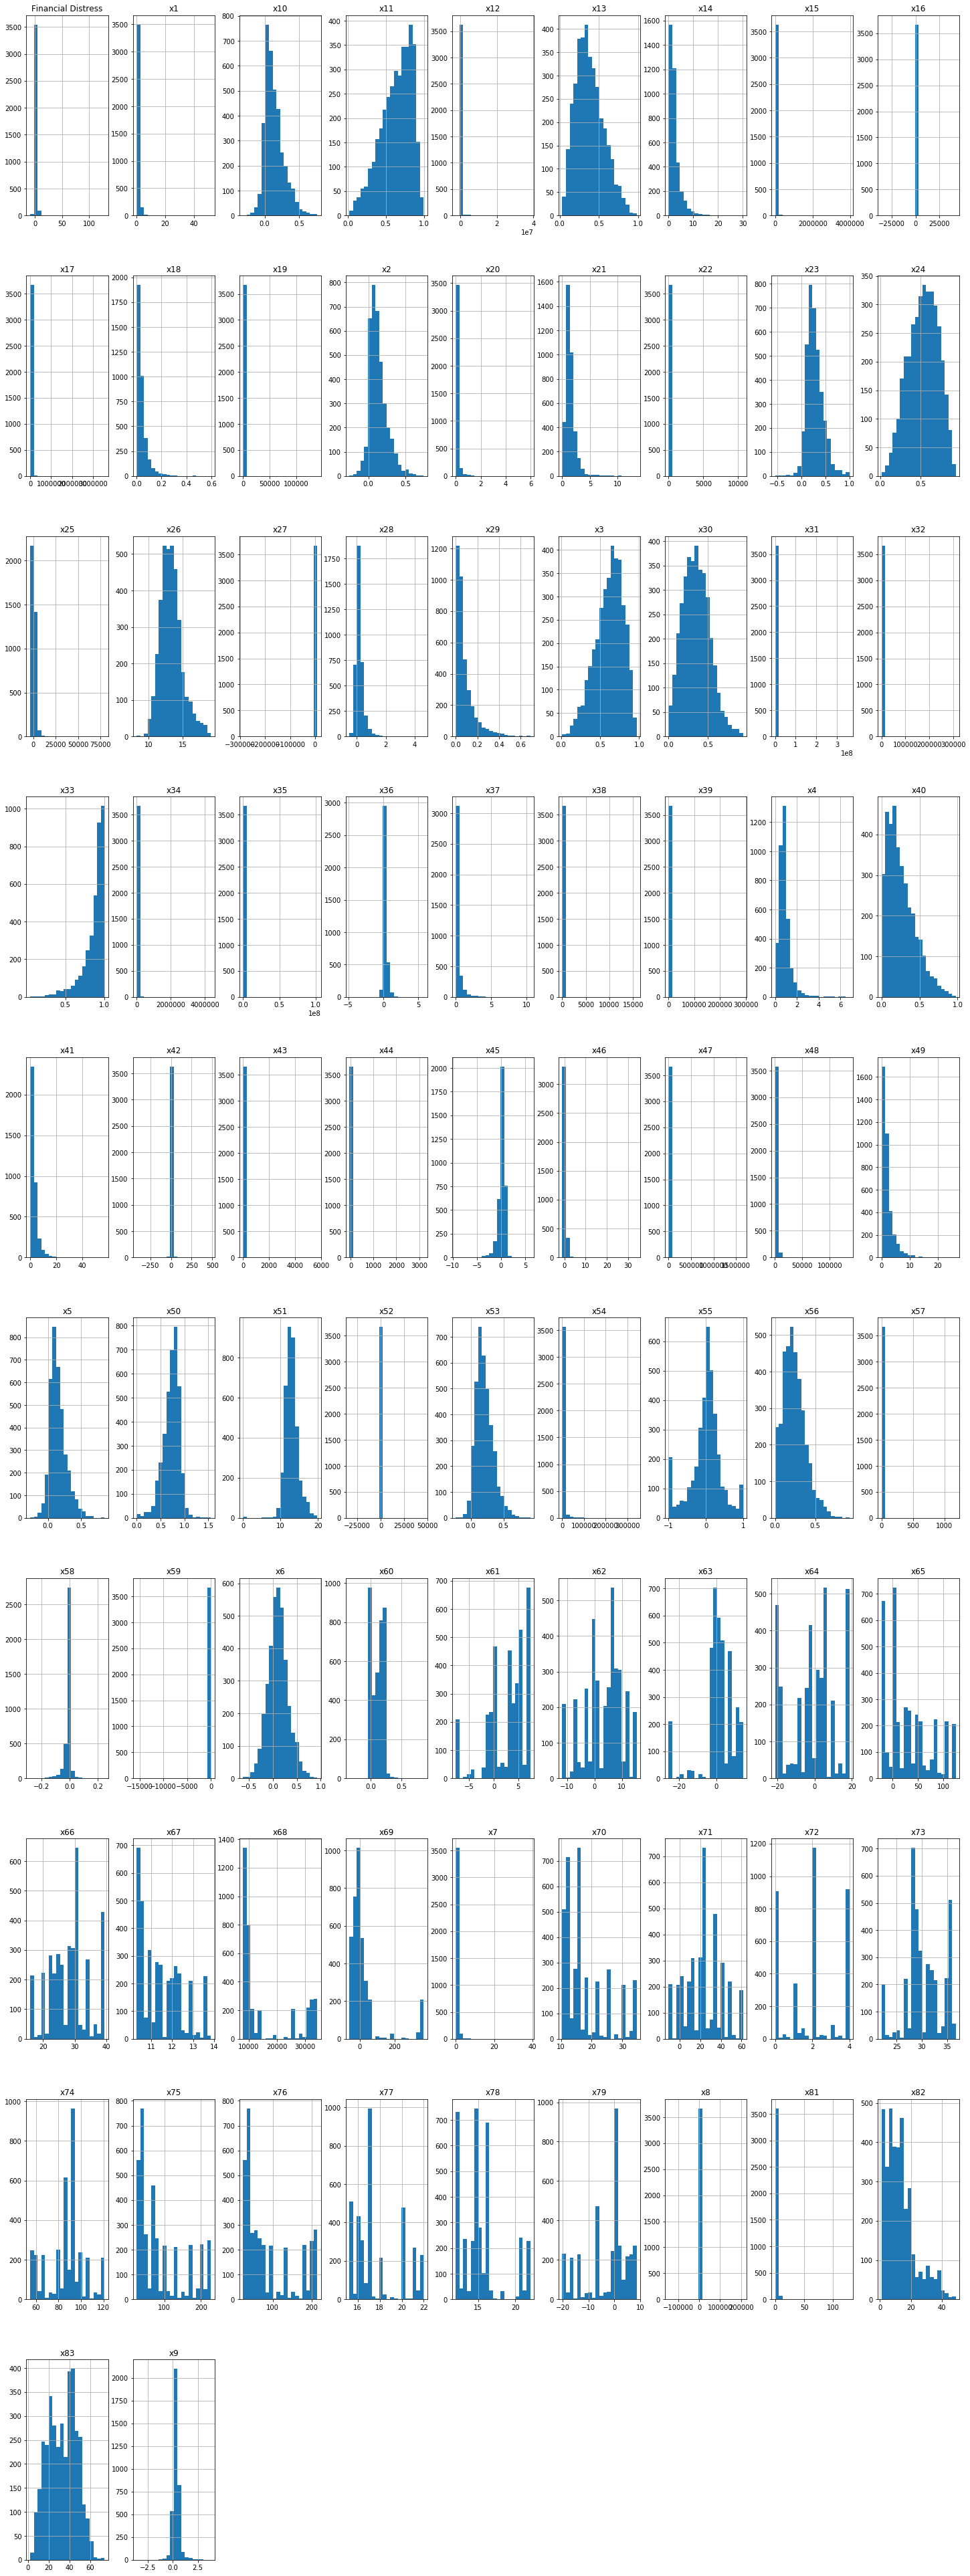

In [9]:
df1.hist(figsize=(25,70), bins = 20);  #plotting Histogram

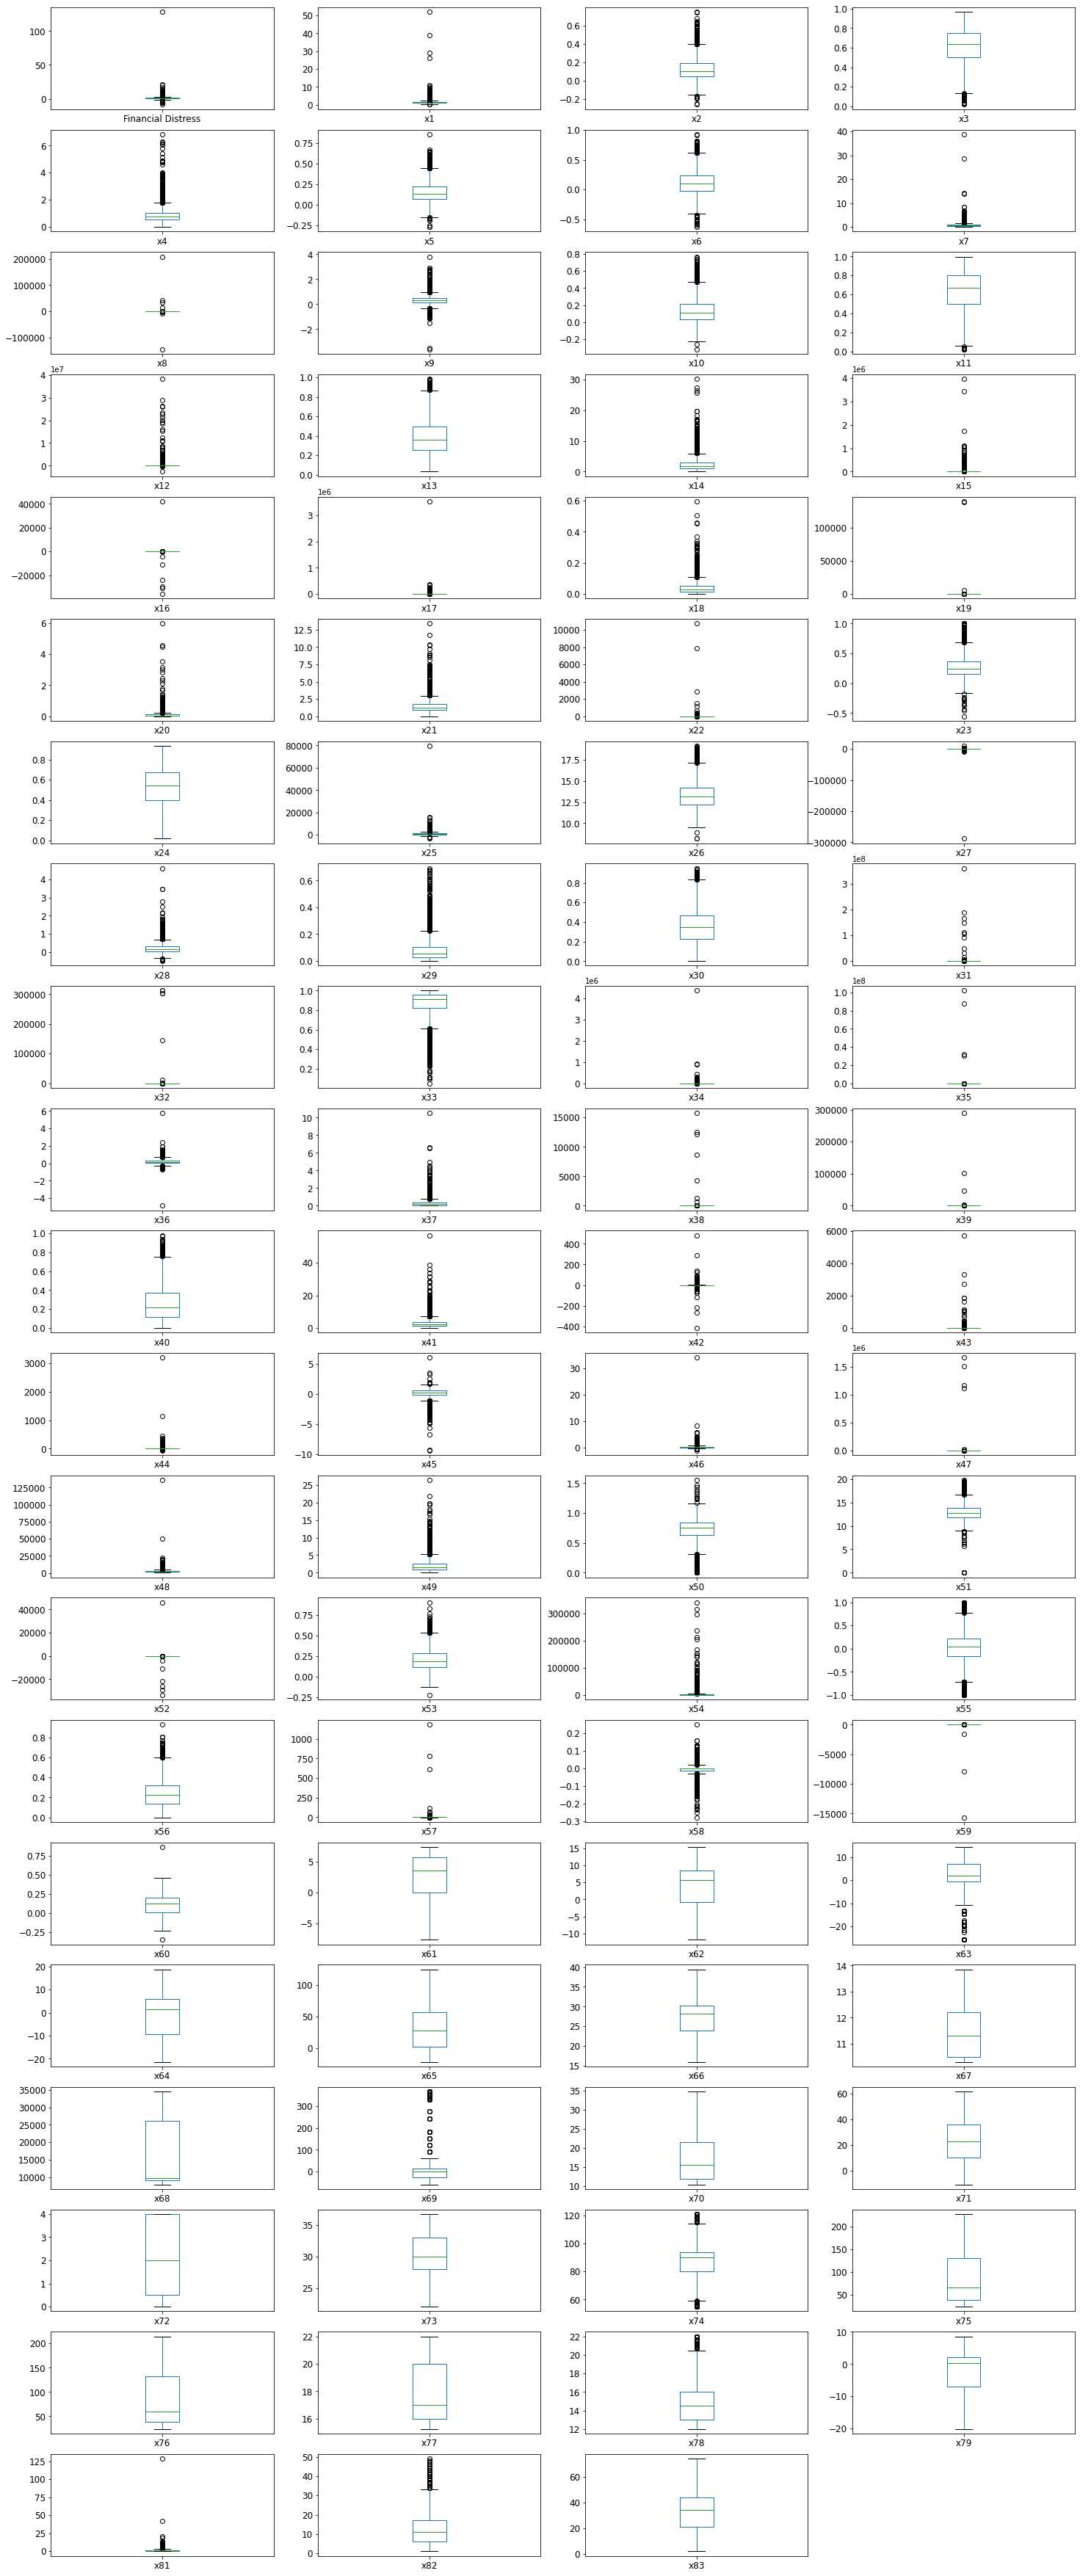

In [ ]:
df1.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70))
plt.show()  #plotting boxplot



```
As we can see there are some extreme values which can be considered as Outliers and we need to replace or remove them altogether
```


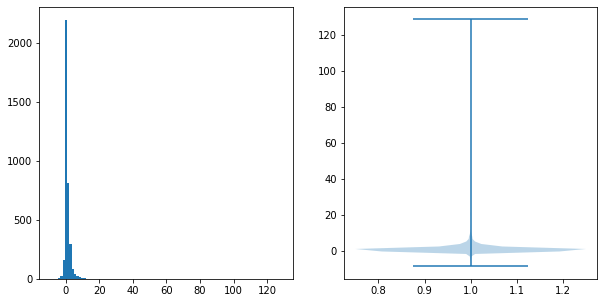

In [11]:
def plot_feature(df, clmn_name):
  '''Function for generating plots for a given Feature given df and column_name'''
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  df[clmn_name].hist(bins = 100, grid = False)
  plt.subplot(122)
  plt.violinplot(df[clmn_name])
  plt.show()
plot_feature(df1, 'Financial Distress')  

```
With this plot we can plot individual hist and violin plots to detect Outliers
```




## Dealing Outliers 



In [12]:
Q1=df1.quantile(q=0.25)                      
Q3=df1.quantile(q=0.75)
IQR= Q3-Q1

fd = df[['Financial Distress']] #
Q1fd=fd.quantile(q=0.25)                      
Q3fd=fd.quantile(q=0.75)
IQRfd= Q3fd-Q1fd

df_fd = fd[(fd >=(Q1fd-3*IQRfd))& (fd <= Q3fd+3*IQRfd)]  
df_inp = df1[(df1 >=(Q1-1.5*IQR))& (df1 <= Q3+1.5*IQR)]
df_inp=df_inp.iloc[:, 1:]
df_imp =  pd.concat([df_fd, df_inp], axis=1)

imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(df_imp)
df_imp = pd.DataFrame(imp_mean.transform(df_imp))
col = df1.columns
df_imp.columns = col

df_imp

Financial Distress      x1        x2       x3       x4        x5  \
0               0.010636  1.2810  0.022934  0.87454  1.21640  0.060940   
1              -0.455970  1.2700  0.006454  0.82067  1.00490 -0.014080   
2              -0.325390  1.0529 -0.059379  0.92242  0.72926  0.020476   
3              -0.566570  1.1131 -0.015229  0.85888  0.80974  0.076037   
4               1.357300  1.0623  0.107020  0.81460  0.83593  0.199960   
...                  ...     ...       ...      ...      ...       ...   
3667            0.438020  2.2605  0.202890  0.16037  0.18588  0.175970   
3668            0.482410  1.9615  0.216440  0.20095  0.21642  0.203590   
3669            0.500770  1.7099  0.207970  0.26136  0.21399  0.193670   
3670            0.611030  1.5590  0.185450  0.30728  0.19307  0.172140   
3671            0.518650  1.6148  0.176760  0.36369  0.18442  0.169550   

            x6        x7        x8        x9  ...   x73         x74     x75  \
0     0.188270  0.525100  0.018854  0.182790  ...  36.0   85.437000   27.07   
1     0.181040  0.622880  0.006423  0.035991  ...  36.0  107.090000   31.31   
2     0.044865  0.432920 -0.081423  0.317941  ...  35.0   86.932713   36.07   
3     0.091033  0.675460 -0.018807 -0.107910  ...  33.0   86.932713   39.80   
4     0.047800  0.742000  0.128030  0.577250  ...  36.0   85.437000   27.07   
...        ...       ...       ...       ...  ...   ...         ...     ...   
3667  0.198400  0.649403  0.160705  0.241640  ...  22.0  100.000000  100.00   
3668  0.189870  0.649403  0.160705  0.270870  ...  28.0   91.500000  130.50   
3669  0.183890  0.649403  0.160705  0.281560  ...  32.0   87.100000  175.90   
3670  0.170680  1.538900  0.160705  0.267720  ...  30.0   92.900000  203.20   
3671  0.197860  1.584200  0.160705  0.277780  ...  29.0   91.700000  227.50   

          x76     x77        x78   x79       x81   x82   x83  
0      26.102  16.000  16.000000   0.2  0.060390  30.0  49.0  
1      30.194  17.000  16.000000   0.4  0.010636  31.0  50.0  
2      35.273  17.000  15.000000  -0.2 -0.455970  32.0  51.0  
3      38.377  17.167  16.000000   5.6 -0.325390  33.0  52.0  
4      26.102  16.000  16.000000   0.2  1.251000   7.0  27.0  
...       ...     ...        ...   ...       ...   ...   ...  
3667  100.000  17.125  14.500000  -7.0  0.436380   4.0  41.0  
3668  132.400  20.000  14.500000 -16.0  0.438020   5.0  42.0  
3669  178.100  20.000  14.500000 -20.2  0.482410   6.0  43.0  
3670  204.500  22.000  14.650239   6.4  0.500770   7.0  44.0  
3671  214.500  21.000  20.500000   8.6  0.611030   8.0  45.0  

[3672 rows x 83 columns]



```
Imputing Nan i.e outliers with mean value of that column. We are considering different ranges for target 
variable and features since 1.5*IQR results in Imputing of significant Data in Financial Distress column.
```



In [13]:
df_imp.isna().values.any()

False



```
Checking If all Nan were replaced
```



## Standardization

In [15]:
scaler=StandardScaler()
df_scal = copy.deepcopy(df_imp)
df_scal = df_scal.iloc[:, 1:]

model = scaler.fit(df_scal)
scaled_data= pd.DataFrame(model.transform(df_scal))   
scaled_data.columns= df_scal.columns

df_findis = df_imp[['Financial Distress']]
df_final =  pd.concat([df_findis, scaled_data], axis =1)

In [16]:
df_final # Standardized data

Financial Distress        x1        x2        x3        x4        x5  \
0               0.010636  0.241328 -0.967909  1.475414  1.293591 -0.791976   
1              -0.455970  0.212837 -1.133603  1.164640  0.675437 -1.498451   
2              -0.325390 -0.349479 -1.795513  1.751631 -0.130181 -1.173032   
3              -0.566570 -0.193554 -1.351613  1.385072  0.105040 -0.649806   
4               1.357300 -0.325132 -0.122479  1.129622  0.181586  0.517195   
...                  ...       ...       ...       ...       ...       ...   
3667            0.438020  2.778357  0.841431 -2.644606 -1.718326  0.291278   
3668            0.482410  2.003909  0.977667 -2.410502 -1.629066  0.551380   
3669            0.500770  1.352234  0.892507 -2.061999 -1.636168  0.457962   
3670            0.611030  0.961383  0.666083 -1.797088 -1.697311  0.255210   
3671            0.518650  1.105913  0.578711 -1.471661 -1.722593  0.230820   

            x6        x7        x8        x9  ...       x73       x74  \
0     0.443043 -0.416388 -0.991650 -0.609427  ...  1.505876 -0.128295   
1     0.405742 -0.088848 -1.078553 -1.271377  ...  1.505876  1.729000   
2    -0.296814 -0.725170 -1.692668  0.000000  ...  1.236625  0.000000   
3    -0.058624  0.087283 -1.254931 -1.920258  ...  0.698123  0.000000   
4    -0.281672  0.310177 -0.228422  1.169281  ...  1.505876 -0.128295   
...        ...       ...       ...       ...  ...       ...       ...   
3667  0.495306  0.000000  0.000000 -0.344059  ... -2.263638  1.120852   
3668  0.451298  0.000000  0.000000 -0.212255  ... -0.648132  0.391761   
3669  0.420446  0.000000  0.000000 -0.164051  ...  0.428872  0.014349   
3670  0.352293  2.979610  0.000000 -0.226459  ... -0.109630  0.511847   
3671  0.492520  3.131354  0.000000 -0.181096  ... -0.378881  0.408916   

           x75       x76       x77           x78       x79       x81  \
0    -1.003137 -0.979380 -0.873022  6.465044e-01  0.349666 -0.912197   
1    -0.937551 -0.915781 -0.382796  6.465044e-01  0.374081 -0.979007   
2    -0.863921 -0.836842 -0.382796  1.675273e-01  0.300835 -1.605577   
3    -0.806224 -0.788598 -0.300928  6.465044e-01  1.008882 -1.430231   
4    -1.003137 -0.979380 -0.873022  6.465044e-01  0.349666  0.686581   
...        ...       ...       ...           ...       ...       ...   
3667  0.124977  0.169164 -0.321518 -7.196126e-02 -0.529289 -0.407309   
3668  0.596765  0.672734  1.087883 -7.196126e-02 -1.627982 -0.405107   
3669  1.299033  1.383016  1.087883 -7.196126e-02 -2.140706 -0.345499   
3670  1.721322  1.793332  2.068336 -8.508342e-16  1.106544 -0.320844   
3671  2.097205  1.948755  1.578110  2.801901e+00  1.375113 -0.172785   

           x82       x83  
0     2.539304  1.163525  
1     2.677678  1.236450  
2     2.816052  1.309375  
3     2.954426  1.382300  
4    -0.643297 -0.440828  
...        ...       ...  
3667 -1.058419  0.580124  
3668 -0.920045  0.653049  
3669 -0.781671  0.725974  
3670 -0.643297  0.798899  
3671 -0.504923  0.871825  

[3672 rows x 83 columns]

```
Since we have 82 features and Target Variable (Financial Distress) of different ranges and while training a Machine Learning Model the features with higher range would have more weight and we should be avoiding this scenario, so we Standardize all the columns except Target Variable since we need raw as output of Predictive Model to classify values into 0’s and 1’s where 1 implies the company is in Financial Distress (<=-0.5) and 0 otherwise.
```

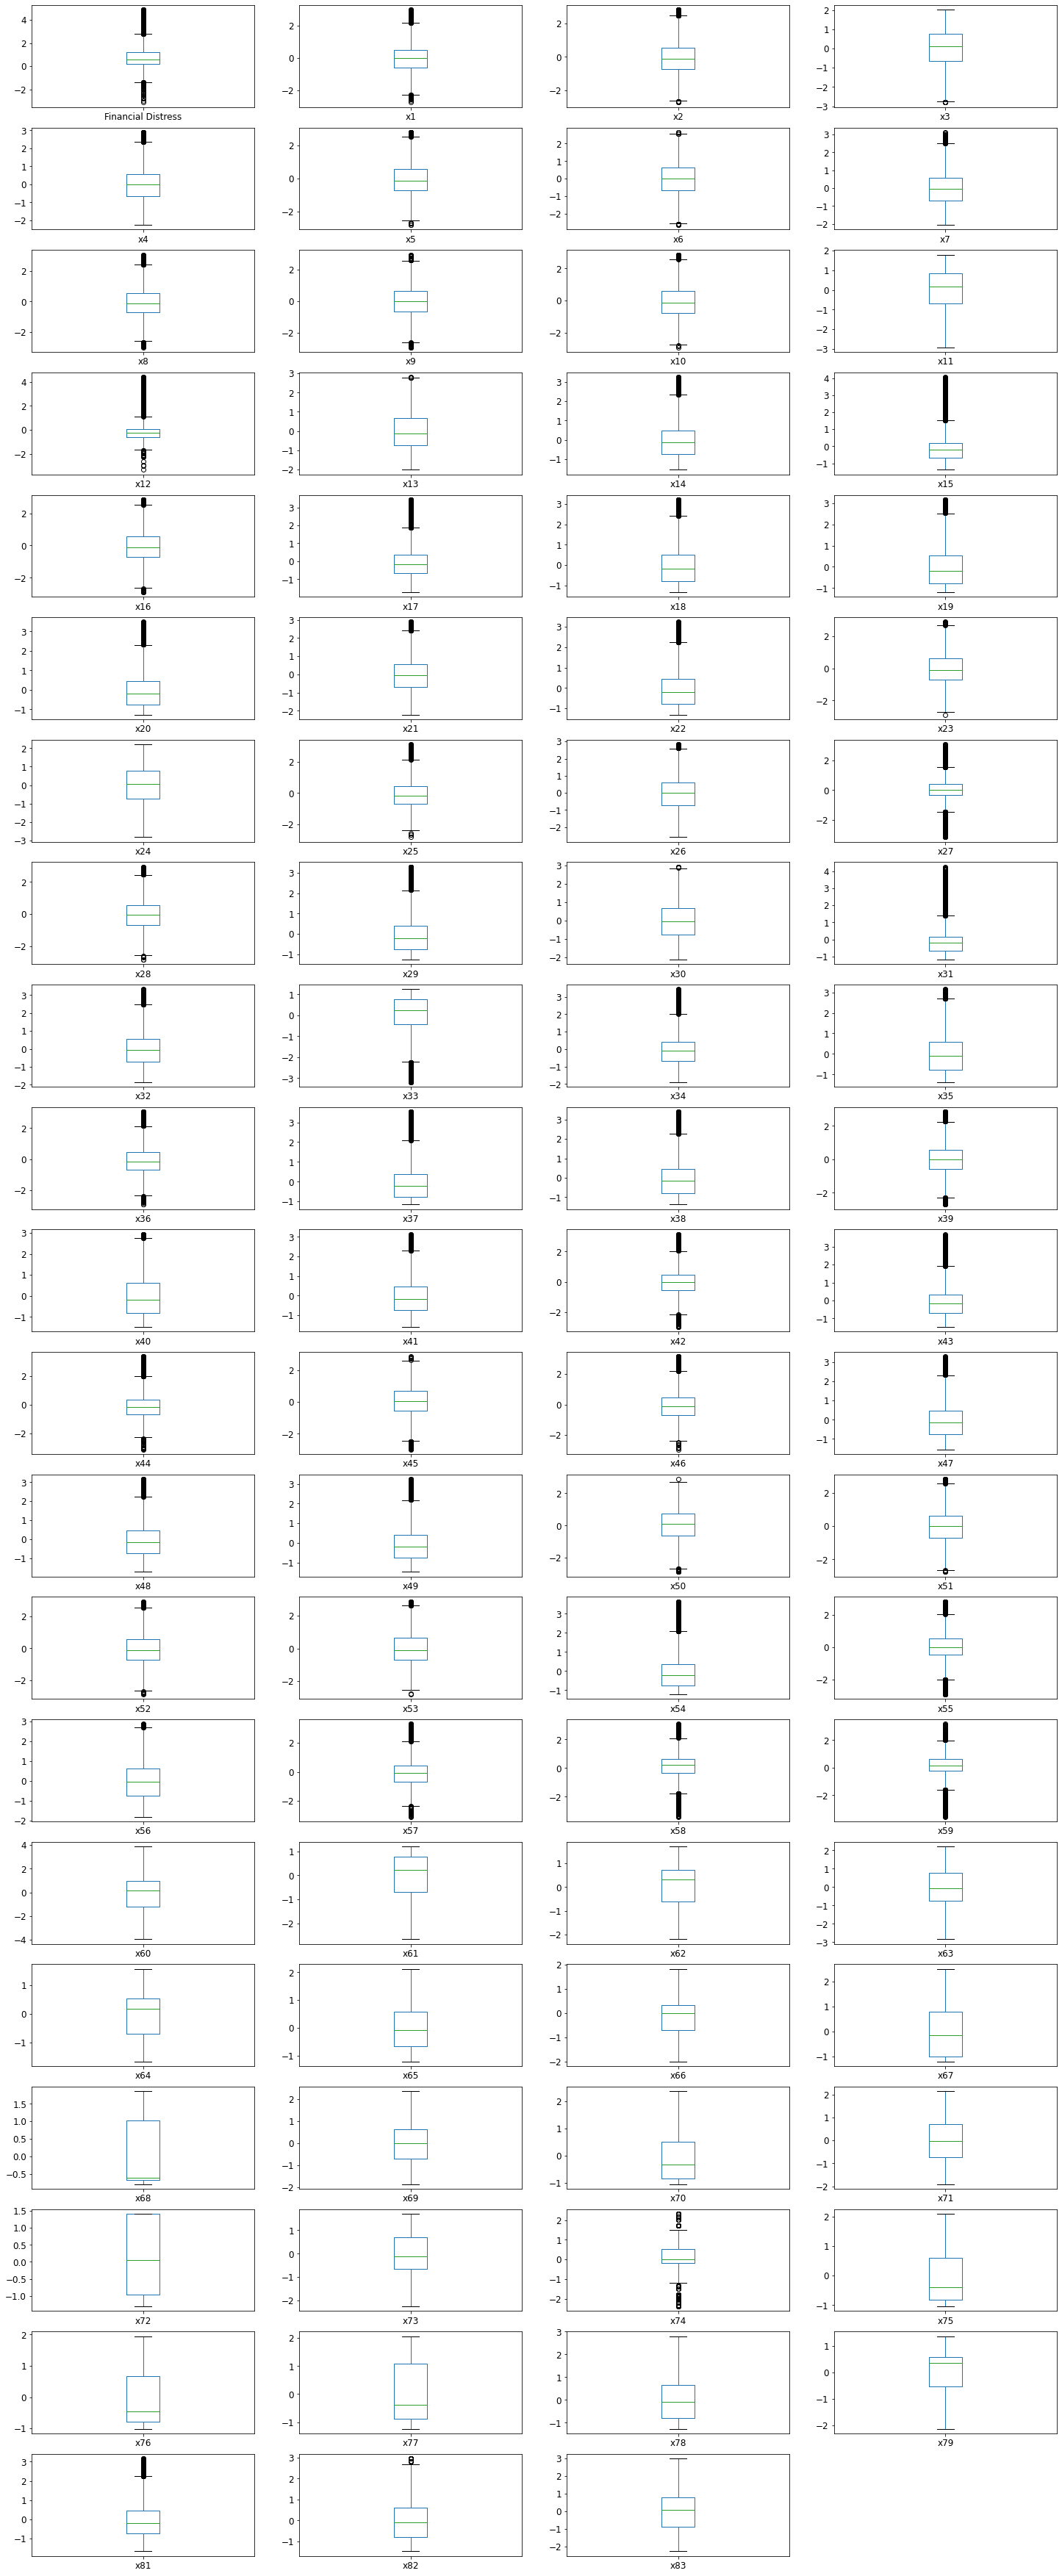

In [ ]:
df_final.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70)); #boxplot 


```
Data after Outlier removal and Stardarization
```



In [17]:
display(desc_stats(df_final), desc_stats(df1))

Financial Distress            x1            x2            x3  \
count            3672.000000  3.672000e+03  3.672000e+03  3.672000e+03   
mean                0.833895  7.262407e-16 -6.957035e-17  7.597409e-16   
std                 1.057821  1.000136e+00  1.000136e+00  1.000136e+00   
min                -3.140000 -2.751044e+00 -2.712680e+00 -2.805329e+00   
25%                 0.177420 -6.075142e-01 -7.051815e-01 -6.576314e-01   
50%                 0.590045 -1.043187e-02 -1.133802e-01  1.148038e-01   
75%                 1.224225  5.090179e-01  5.629756e-01  7.536298e-01   
max                 4.887800  2.974948e+00  2.803938e+00  2.014004e+00   
skewness            1.078923  4.437920e-01  5.389680e-01 -4.463636e-01   
kurtosis            2.100514  3.869968e-01  1.011135e-01 -3.992146e-01   

                    x4            x5            x6            x7  \
count     3.672000e+03  3.672000e+03  3.672000e+03  3.672000e+03   
mean     -2.947291e-16 -2.130724e-16 -3.522358e-18  3.761213e-17   
std       1.000136e+00  1.000136e+00  1.000136e+00  1.000136e+00   
min      -2.261598e+00 -2.813367e+00 -2.645058e+00 -2.057575e+00   
25%      -6.466317e-01 -7.002227e-01 -6.546743e-01 -7.148443e-01   
50%       0.000000e+00 -1.179441e-01 -7.159851e-17 -2.521861e-02   
75%       5.522297e-01  5.933095e-01  6.315094e-01  5.719618e-01   
max       2.902838e+00  2.812625e+00  2.655934e+00  3.131354e+00   
skewness  3.089710e-01  4.923561e-01  6.310912e-02  5.133867e-01   
kurtosis  1.374735e-01  8.985991e-02 -1.734307e-01  6.992383e-02   

                    x8            x9  ...           x73           x74  \
count     3.672000e+03  3.672000e+03  ...  3.672000e+03  3.672000e+03   
mean      3.235127e-17  1.023827e-16  ... -7.849567e-16  5.664193e-16   
std       1.000136e+00  1.000136e+00  ...  1.000136e+00  1.000136e+00   
min      -3.002445e+00 -2.920359e+00  ... -2.263638e+00 -2.384361e+00   
25%      -7.113260e-01 -6.736949e-01  ... -6.481320e-01 -1.949430e-01   
50%      -1.421902e-01 -1.910228e-02  ... -1.096299e-01  1.434914e-02   
75%       5.348521e-01  6.159992e-01  ...  6.981233e-01  5.118467e-01   
max       3.065228e+00  2.925578e+00  ...  1.707815e+00  2.319993e+00   
skewness  6.841146e-01  1.833571e-01  ... -1.582153e-01 -6.563958e-01   
kurtosis  5.683628e-01  5.432218e-02  ... -3.372308e-01  4.849837e-01   

                   x75           x76           x77           x78  \
count     3.672000e+03  3.672000e+03  3.672000e+03  3.672000e+03   
mean      4.027280e-16  1.227050e-15  2.516143e-16 -9.115197e-16   
std       1.000136e+00  1.000136e+00  1.000136e+00  1.000136e+00   
min      -1.045706e+00 -1.015531e+00 -1.240692e+00 -1.269404e+00   
25%      -8.062237e-01 -7.885984e-01 -8.730223e-01 -7.904269e-01   
50%      -3.990940e-01 -4.607495e-01 -3.827959e-01 -7.196126e-02   
75%       5.967652e-01  6.727335e-01  1.087883e+00  6.465044e-01   
max       2.097205e+00  1.948755e+00  2.068336e+00  2.801901e+00   
skewness  9.129975e-01  8.901987e-01  7.790013e-01  1.045680e+00   
kurtosis -5.744694e-01 -7.433442e-01 -7.562175e-01  1.552003e+00   

                   x79           x81           x82           x83  
count     3.672000e+03  3.672000e+03  3.672000e+03  3.672000e+03  
mean      2.102530e-16  3.408977e-17 -3.402023e-16  2.929755e-17  
std       1.000136e+00  1.000136e+00  1.000136e+00  1.000136e+00  
min      -2.140706e+00 -1.663654e+00 -1.473541e+00 -2.263956e+00  
25%      -5.292889e-01 -7.382709e-01 -7.816713e-01 -8.783783e-01  
50%       3.496659e-01 -1.946259e-01 -8.980140e-02  6.964826e-02  
75%       5.816123e-01  4.552466e-01  6.020685e-01  7.988995e-01  
max       1.375113e+00  3.161269e+00  2.954426e+00  2.986653e+00  
skewness -7.320595e-01  1.057550e+00  7.960057e-01 -2.381237e-02  
kurtosis -5.139149e-01  7.280874e-01  4.118171e-01 -9.241602e-01  

[10 rows x 83 columns]

Financial Distress           x1           x2           x3  \
count            3672.000000  3672.000000  3672.000000  3672.000000   
mean                1.040257     1.387820     0.129706     0.615769   
std                 2.652227     1.452926     0.120013     0.177904   
min                -8.631700     0.075170    -0.258080     0.016135   
25%                 0.172275     0.952145     0.048701     0.501888   
50%                 0.583805     1.183600     0.107530     0.638690   
75%                 1.351750     1.506475     0.188685     0.749425   
max               128.400000    51.954000     0.749410     0.967900   
skewness           30.873600    20.058157     1.026241    -0.514097   
kurtosis         1451.206671   579.289645     1.815265    -0.232932   

                    x4           x5           x6           x7             x8  \
count     3.672000e+03  3672.000000  3672.000000  3672.000000    3672.000000   
mean      8.681599e-01     0.154949     0.106717     0.784031      39.274361   
std       5.719519e-01     0.124904     0.210555     1.033606    4305.688039   
min       5.350000e-07    -0.269790    -0.627750     0.035160 -145000.000000   
25%       5.525575e-01     0.070001    -0.027754     0.436003       0.056185   
50%       7.752450e-01     0.131830     0.104325     0.641875       0.135585   
75%       1.039000e+00     0.219570     0.231230     0.896773       0.273423   
max       6.835600e+00     0.858540     0.929550    38.836000  209000.000000   
skewness  3.214546e+00     0.871433     0.169445    21.014228      21.162111   
kurtosis  2.019422e+01     1.341499     0.351143   664.142698    1865.899414   

                   x9  ...          x73          x74          x75  \
count     3672.000000  ...  3672.000000  3672.000000  3672.000000   
mean         0.332610  ...    30.407166    86.839822    91.920506   
std          0.346135  ...     3.714512    16.706209    64.656504   
min         -3.611200  ...    22.000000    54.806000    24.318000   
25%          0.157677  ...    28.000000    79.951000    39.800000   
50%          0.302610  ...    30.000000    90.000000    66.120000   
75%          0.484035  ...    33.000000    93.883000   130.500000   
max          3.810200  ...    36.750000   120.870000   227.500000   
skewness     0.712157  ...    -0.158215    -0.168586     0.912998   
kurtosis    19.439512  ...    -0.337231    -0.215441    -0.574469   

                  x76          x77          x78          x79          x81  \
count     3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean        89.115908    17.780855    15.198708    -2.664305     1.100488   
std         64.349382     2.040152     2.828648     8.192663     2.666733   
min         23.776000    15.250000    12.000000   -20.200000    -0.499220   
25%         38.377000    16.000000    13.000000    -7.000000     0.189912   
50%         59.471000    17.000000    14.500000     0.200000     0.594765   
75%        132.400000    20.000000    16.000000     2.100000     1.355050   
max        214.500000    22.000000    22.000000     8.600000   128.400000   
skewness     0.890199     0.779001     1.086483    -0.732060    31.234347   
kurtosis    -0.743344    -0.756217     0.485082    -0.513915  1431.085028   

                  x82          x83  
count     3672.000000  3672.000000  
mean        13.122277    33.044935  
std          9.465907    13.714563  
min          1.000000     2.000000  
25%          6.000000    21.000000  
50%         11.000000    34.000000  
75%         17.000000    44.000000  
max         49.000000    74.000000  
skewness     1.156911    -0.023812  
kurtosis     1.039430    -0.924160  

[10 rows x 83 columns]



```
You can see how data looks after and before and after Preprocessing
```



In [18]:
df_final.isnull().values.any() # Checking if there are any null values for the scaled data

False



```
As we can see all outliers were removed except for Financial Distress
```



## Data Visualization

In [21]:
corr_df = df_final.corr()
corr_df = pd.DataFrame(corr_df)           
corr_fd = corr_df.iloc[0, :]
corr_fd[:]                             

Financial Distress    1.000000
x1                    0.166370
x2                    0.441687
x3                   -0.211881
x4                    0.140585
                        ...   
x78                  -0.061021
x79                  -0.140859
x81                   0.610939
x82                   0.015643
x83                   0.041779
Name: Financial Distress, Length: 83, dtype: float64

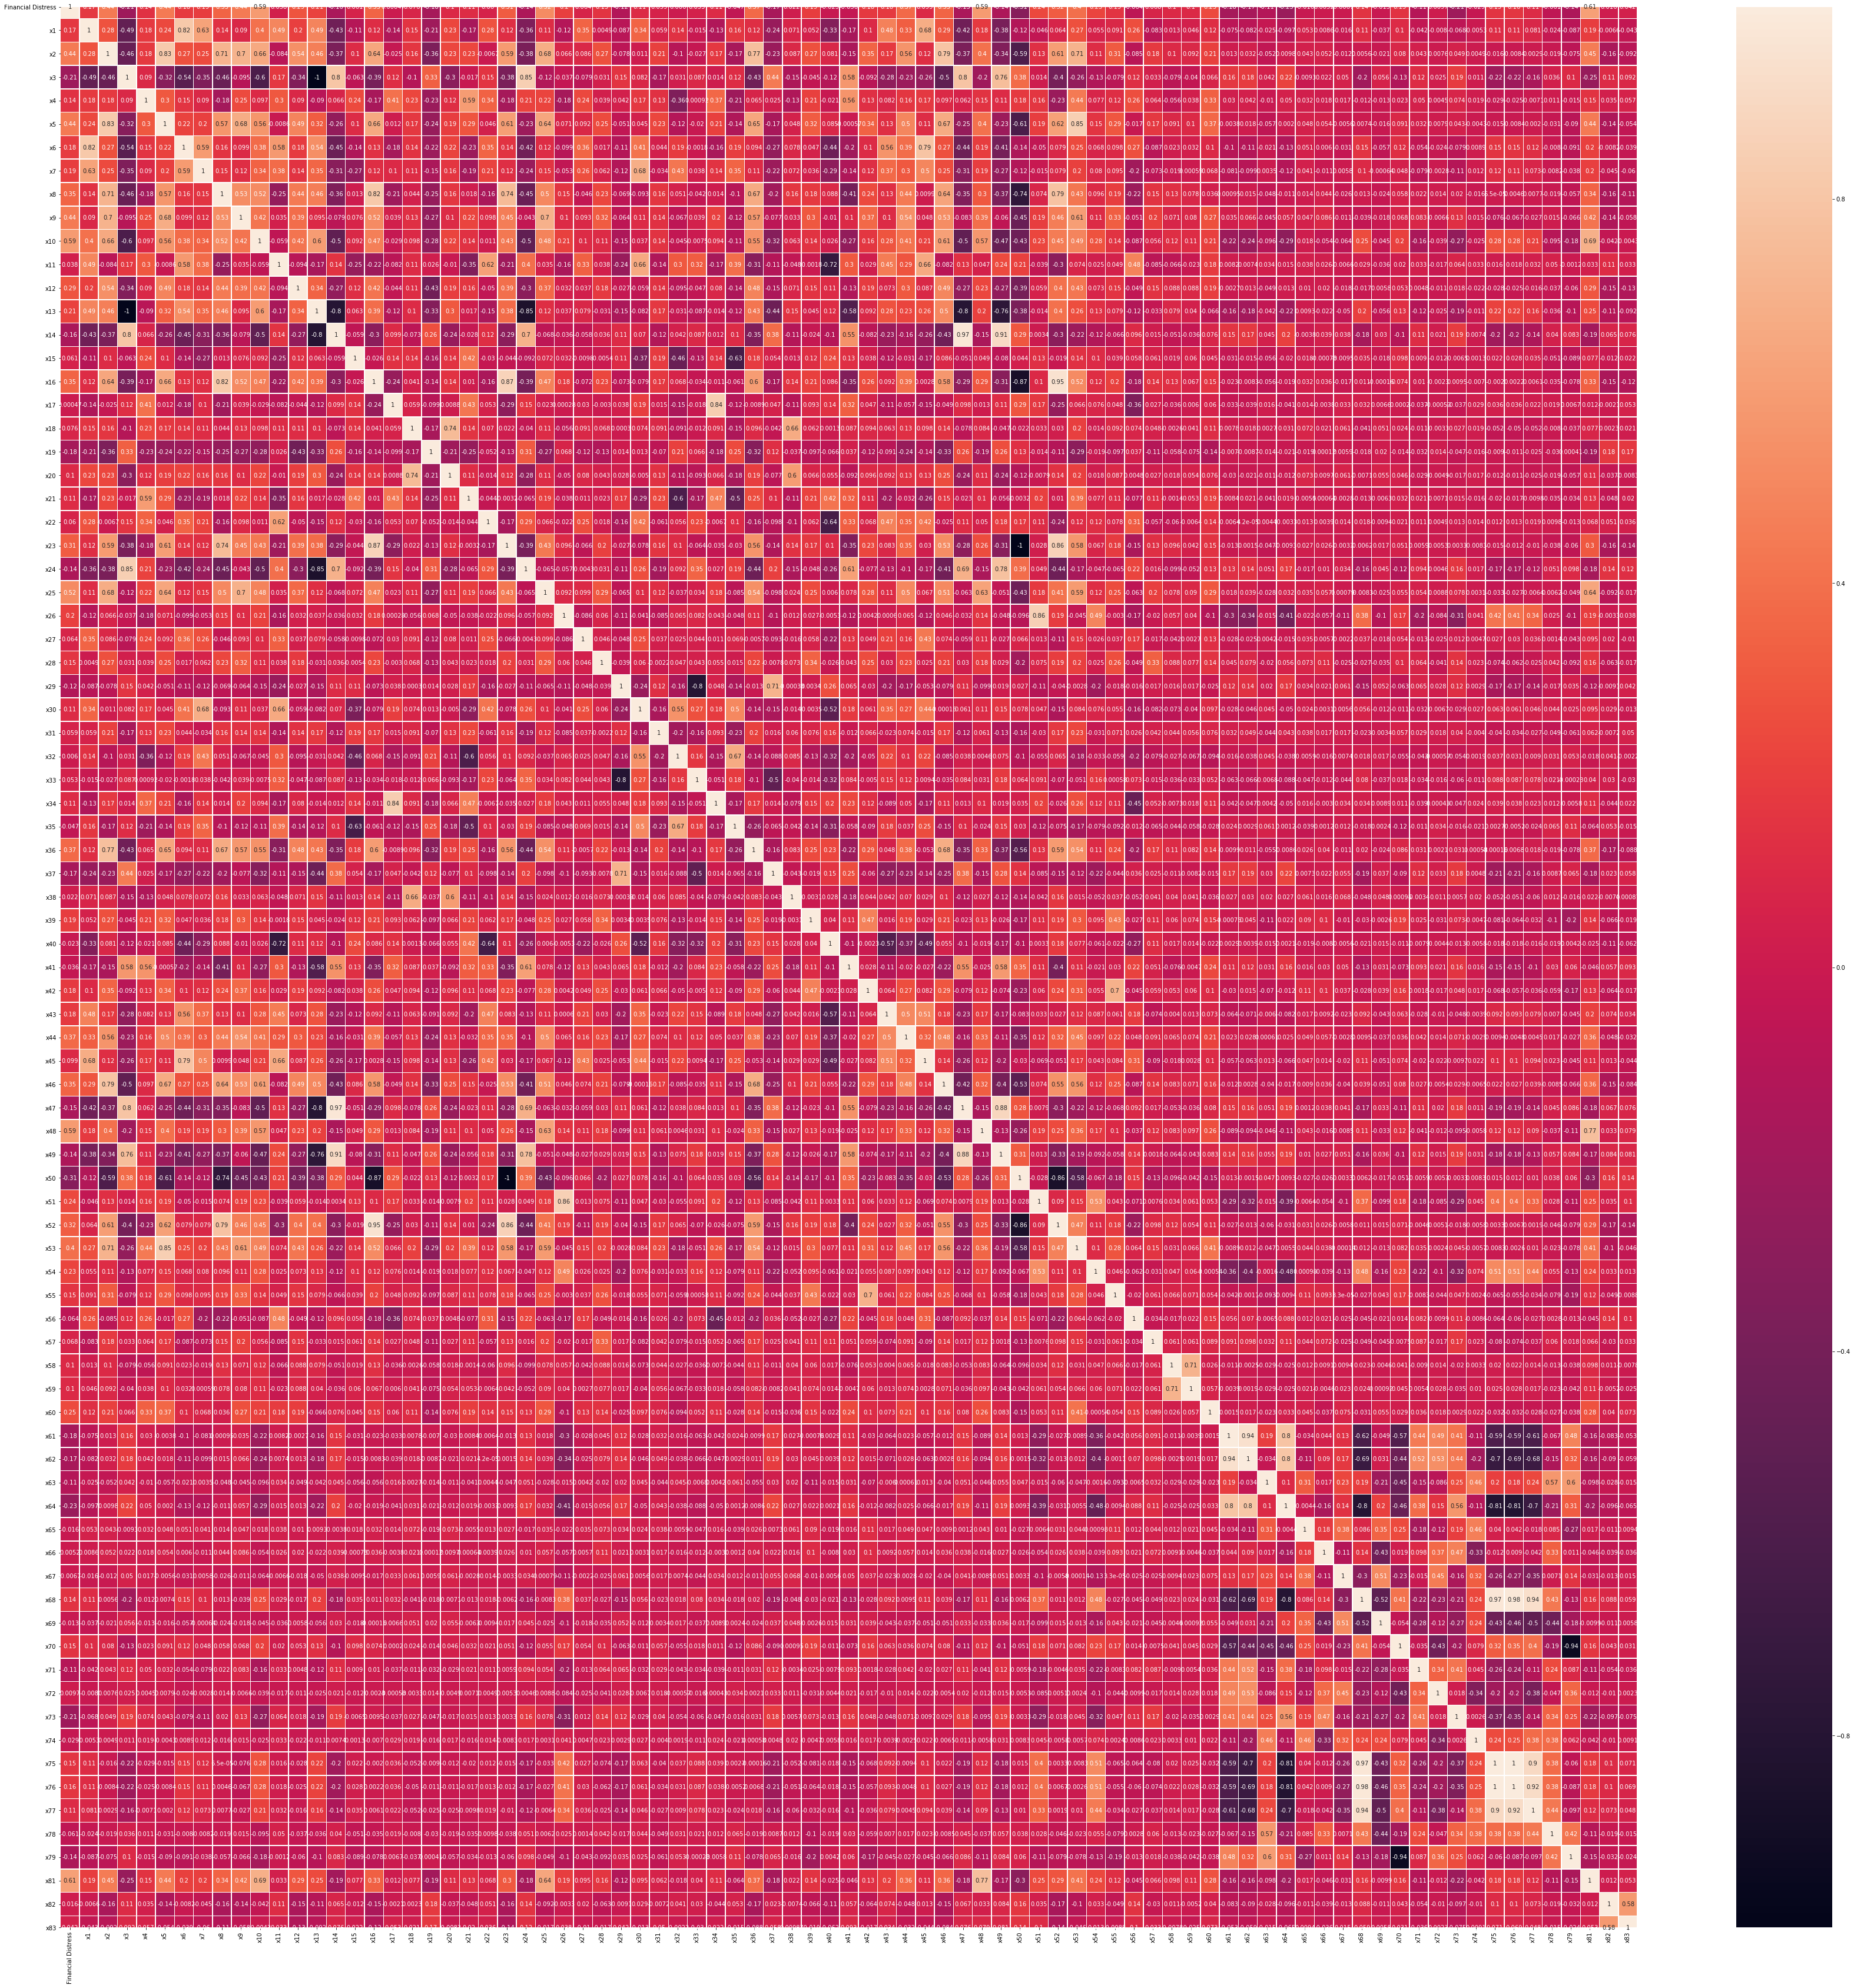

In [22]:
fig,ax = plt.subplots(figsize = (60,60))      # Correlation Heat Map
ax = sns.heatmap(corr_df, annot=True, linewidths=0.5)

**Plotting Highly correlated Heatmap**

In [28]:
corr = pd.DataFrame(corr_df[(corr_df>=0.5)|(corr_df<=-0.5)]) # Correlation dictionary for highly correlated values.
corr_dict = {}
for f in corr.index:
  corr_dict[f] = pd.DataFrame(corr.sort_values(f)[f].dropna())

In [31]:
def plot_highcorrheatmap():
  '''Function to plot highly correlated values on heatmap i.e. >0.5 & <-0.5'''
  fig,ax = plt.subplots(figsize = (50,50))
  mask = corr.isnull()
  ax = sns.heatmap(corr, annot=True, linewidths=0.5, mask = mask, cmap = "CMRmap") 

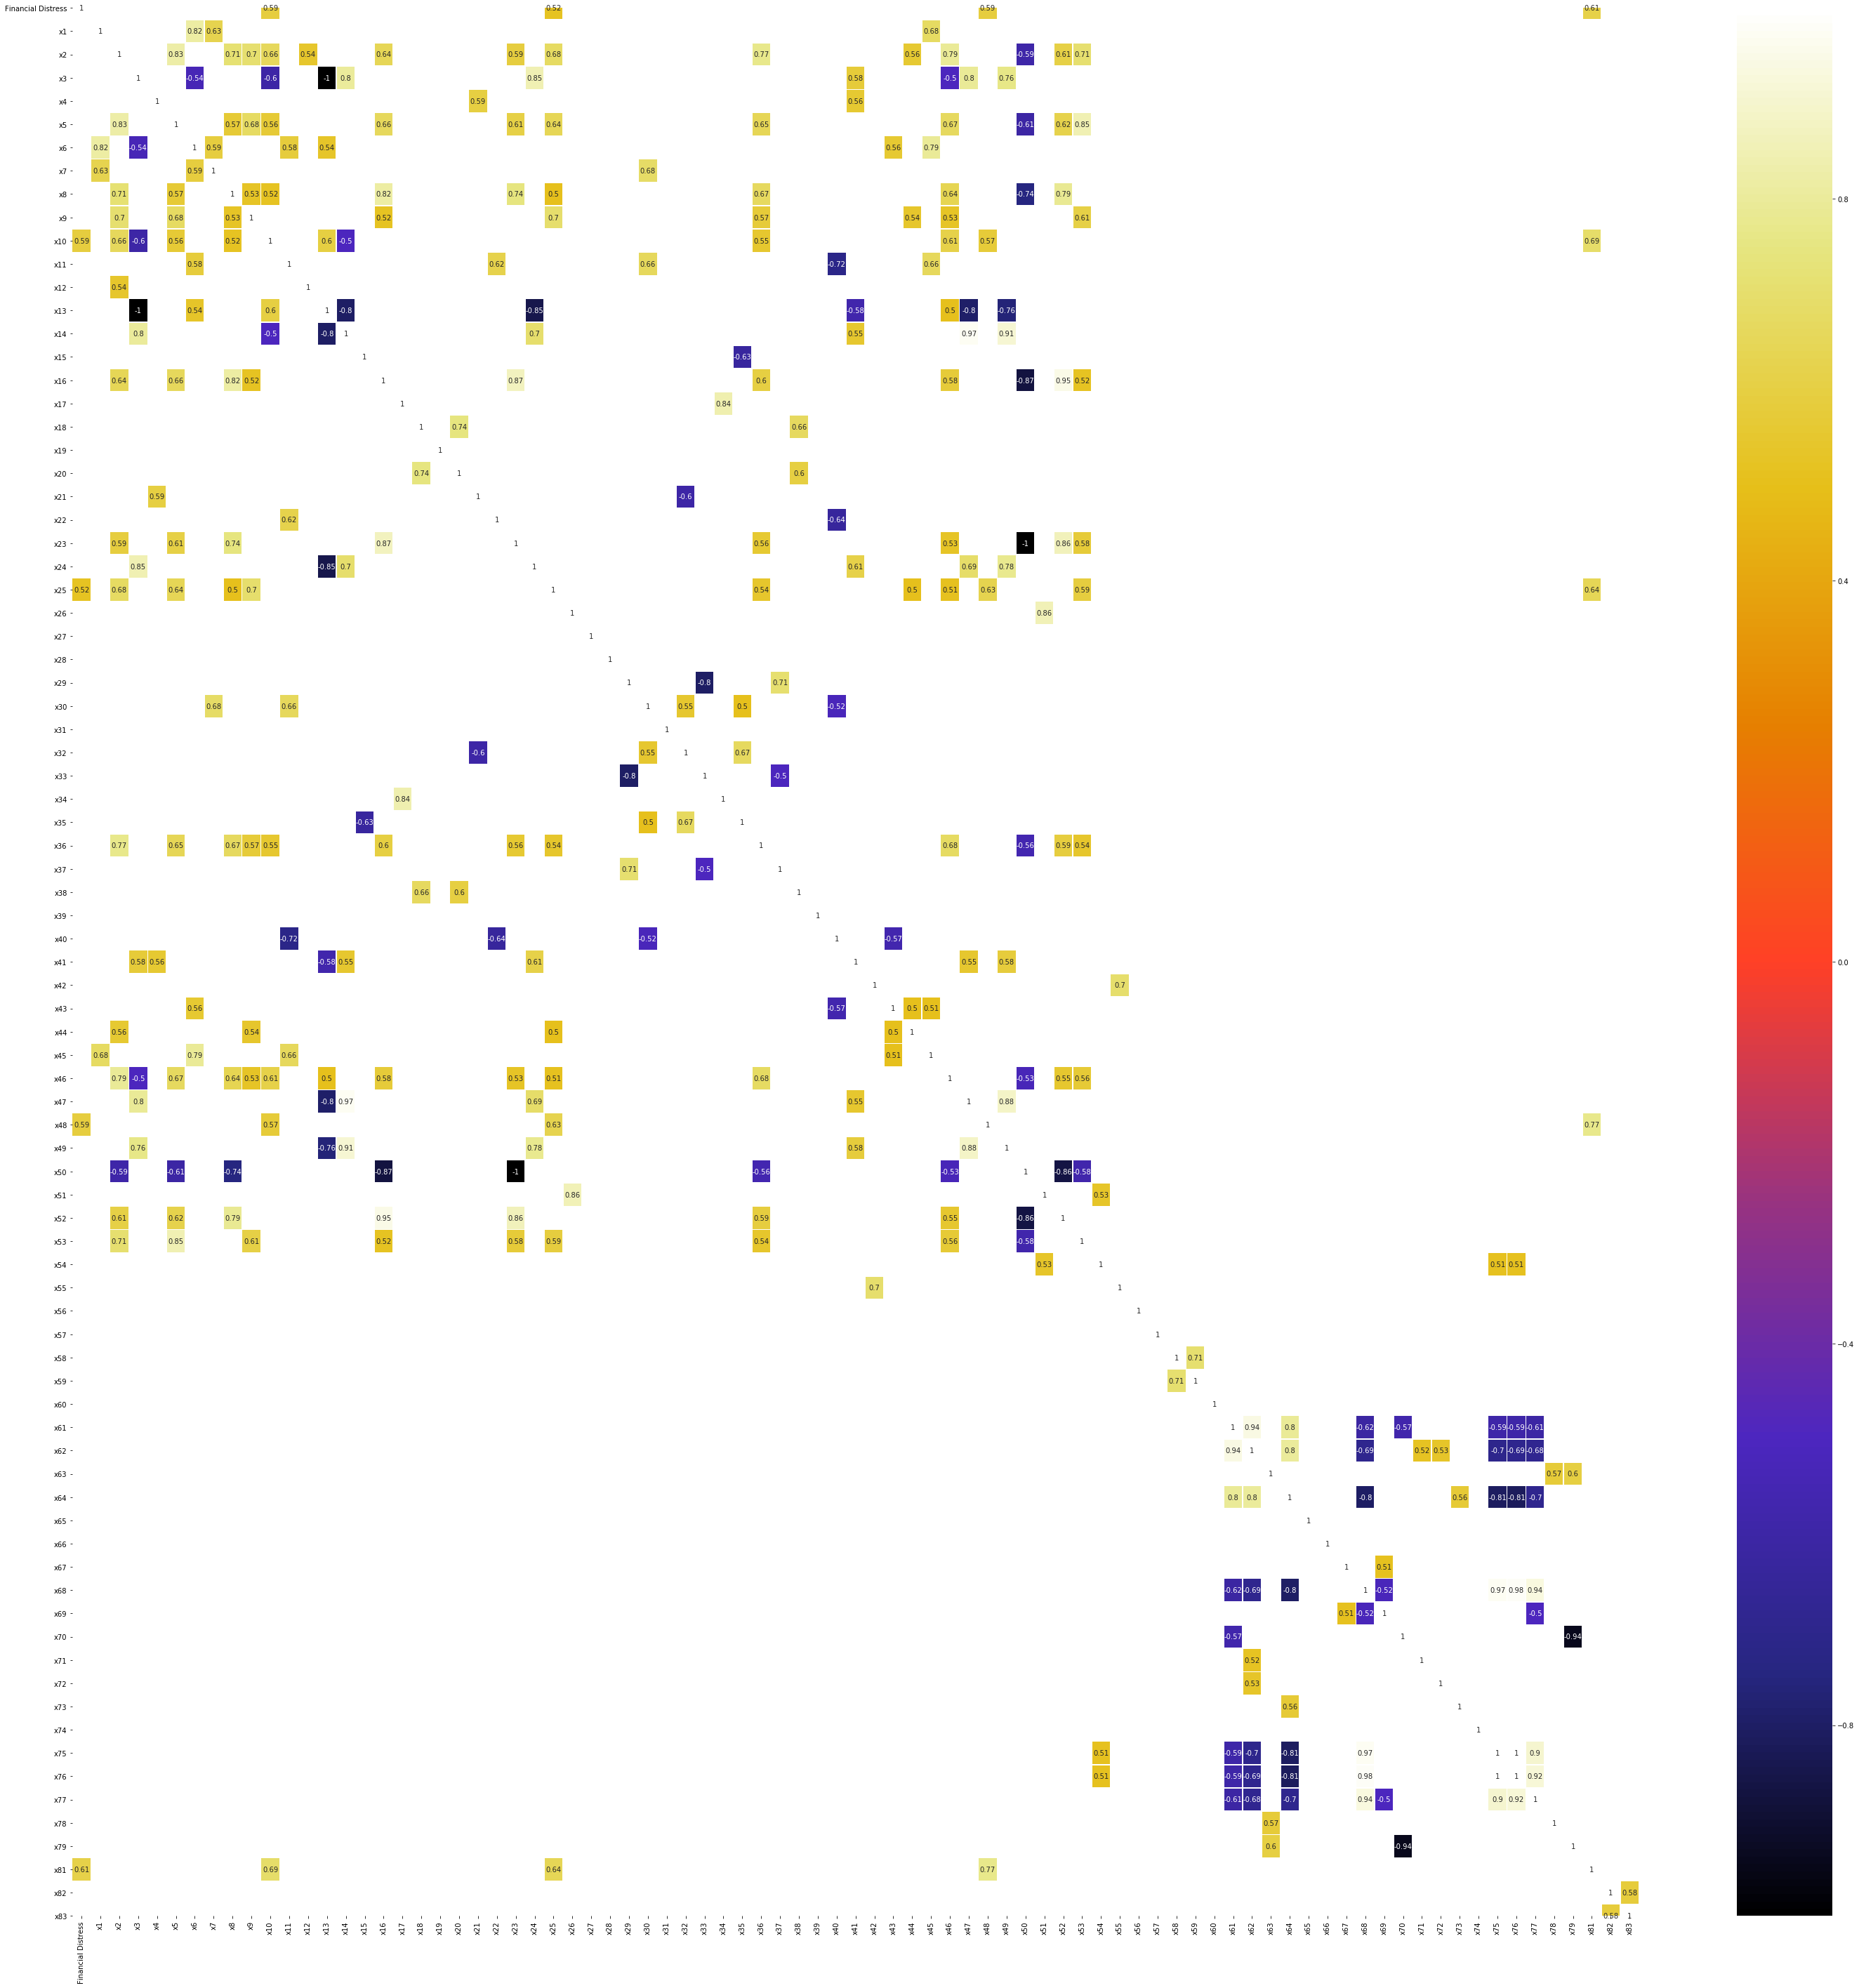

In [32]:
plot_highcorrheatmap()  # plotting only features with corr > 0.5 and corr < -0.5


```
We mask out some correlation values in original heatmap since we dont extract much information from initial visualization. We only considered correlation values >0.5 and <-0.5 and we can observe some high correlation between features.
```

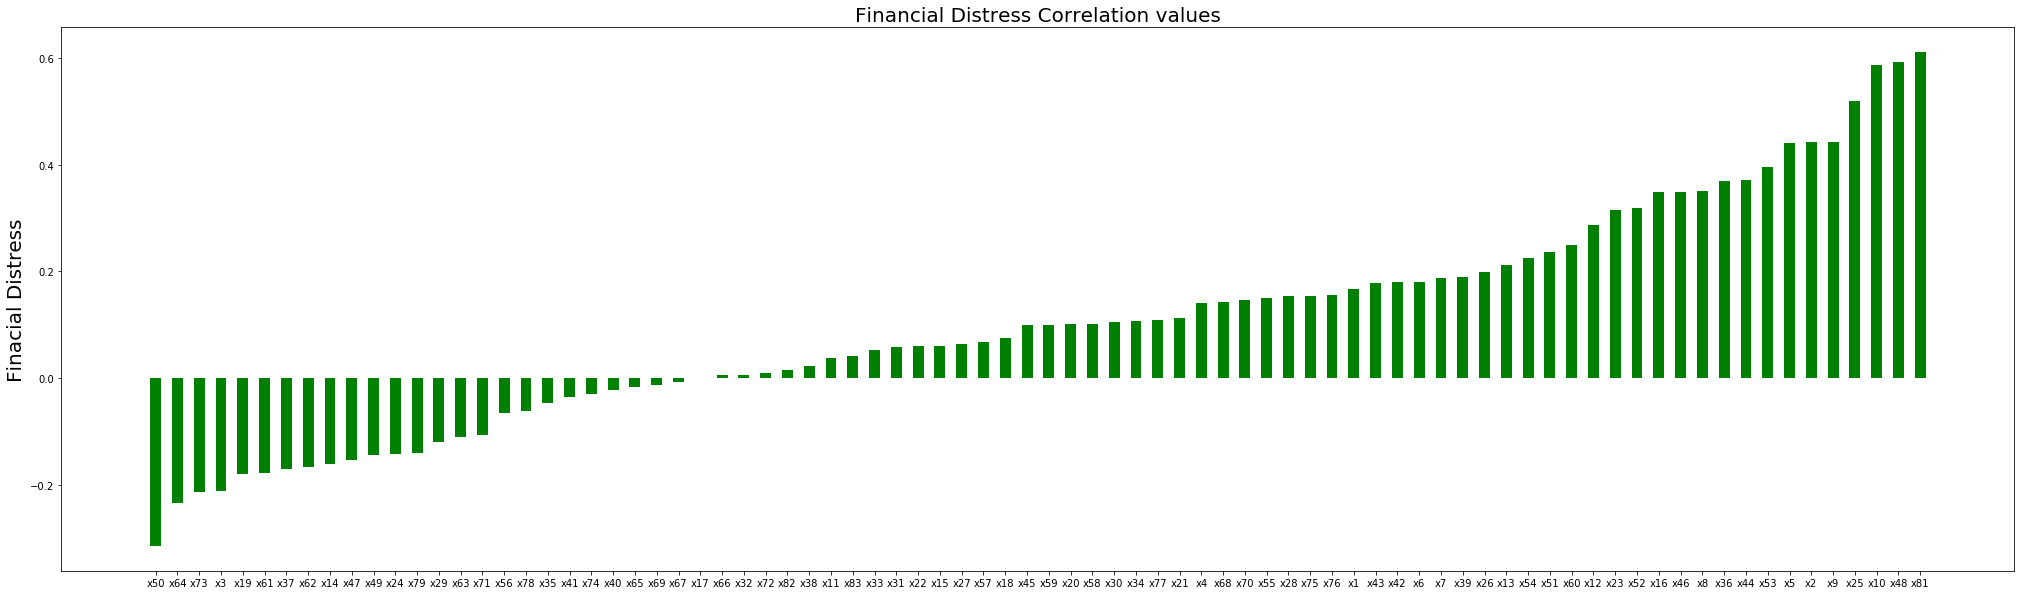

In [33]:
plt.figure(figsize=(35,10))
plt.bar(corr_fd.sort_values().iloc[:-1].index, corr_fd.sort_values().iloc[:-1], width=0.5, align='center', color = 'g')
plt.ylabel(ylabel='Finacial Distress', size=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title(label = 'Financial Distress Correlation values', size = 20)
plt.show()                           # barplot for correlation values for all features Ascending order



```
As we can see x48, x10, x81( corr > 0.5) and no values less than -0.5. we will use these features for visualizing financial distress.
```
```
Note: positive correlation x81,10,x48,x25,x2,x5,x16,x9,x8,x53,x23,x44,x52,x36,x46,x12,x60,x54
negative correlation x50,x3,x64,x37,x73,61,x24,x62,x29,x19,x49
```


In [34]:
def processed_df(df):
    '''
    Function for getting cleaned and transformed data
    '''
    #df = pd.read_csv('Financial Distress.csv')
    df1 = df.iloc[:, 3:]
    df1 = df1.drop('x80', axis =1)
    
    Q1=df1.quantile(q=0.25)                      
    Q3=df1.quantile(q=0.75)
    IQR= Q3-Q1
    
    fd = df[['Financial Distress']] #
    Q1fd=fd.quantile(q=0.25)                      
    Q3fd=fd.quantile(q=0.75)
    IQRfd= Q3fd-Q1fd

    df_fd = fd[(fd >=(Q1fd-3*IQRfd))& (fd <= Q3fd+3*IQRfd)]  


    df_inp = df1[(df1 >=(Q1-1.5*IQR))& (df1 <= Q3+1.5*IQR)]
    df_inp = pd.concat([df_fd, df_inp], axis =1)

    imp_mean= SimpleImputer(missing_values=np.nan,strategy='mean')
    imp_mean.fit(df_inp)
    df_imp = pd.DataFrame(imp_mean.transform(df_inp))
    col = df1.columns.insert(0, 'Financial Distress')
    df_imp.columns = col
    
    scaler=StandardScaler()
    df_scal = copy.deepcopy(df_imp)
    df_scal = df_scal.iloc[:, 1:]
    
    model = scaler.fit(df_scal)
    scaled_data= pd.DataFrame(model.transform(df_scal))   
    scaled_data.columns= df_scal.columns

    df_findis = df_imp[['Financial Distress']]
    df_final =  pd.concat([df_findis, scaled_data], axis =1)
    #   scaled_data = scaled_data.iloc[:, :]
    #scaled_data = pd.concat([scaled_fd, scaled_data], axis =1)
    
    return df_final

In [35]:
def get_corr(df ,pos, neg):
  

  corr_df = df.corr()
  corr_df = pd.DataFrame(corr_df)
  fd_corr = corr_df.iloc[0, :] 

  corr = pd.DataFrame(corr_df[(corr_df>=pos)|(corr_df<= neg)])
  corr_dict = {}
  for f in corr.index:
    corr_dict[f] = pd.DataFrame(corr.sort_values(f)[f].dropna())
  return corr_df, fd_corr, corr_dict
  

In [37]:
df = pd.read_csv('Financial Distress.csv')
# df = load_data(df)
df_final = processed_df(df)
corr_df, fd_corr, highcorr_dict = get_corr(df_final , 0.5, -0.5)

In [38]:
df_final

Financial Distress        x1        x2        x3        x4        x5  \
0               0.010636  0.241328 -0.967909  1.475414  1.293591 -0.791976   
1              -0.455970  0.212837 -1.133603  1.164640  0.675437 -1.498451   
2              -0.325390 -0.349479 -1.795513  1.751631 -0.130181 -1.173032   
3              -0.566570 -0.193554 -1.351613  1.385072  0.105040 -0.649806   
4               1.357300 -0.325132 -0.122479  1.129622  0.181586  0.517195   
...                  ...       ...       ...       ...       ...       ...   
3667            0.438020  2.778357  0.841431 -2.644606 -1.718326  0.291278   
3668            0.482410  2.003909  0.977667 -2.410502 -1.629066  0.551380   
3669            0.500770  1.352234  0.892507 -2.061999 -1.636168  0.457962   
3670            0.611030  0.961383  0.666083 -1.797088 -1.697311  0.255210   
3671            0.518650  1.105913  0.578711 -1.471661 -1.722593  0.230820   

            x6        x7        x8        x9  ...       x73       x74  \
0     0.443043 -0.416388 -0.991650 -0.609427  ...  1.505876 -0.128295   
1     0.405742 -0.088848 -1.078553 -1.271377  ...  1.505876  1.729000   
2    -0.296814 -0.725170 -1.692668  0.000000  ...  1.236625  0.000000   
3    -0.058624  0.087283 -1.254931 -1.920258  ...  0.698123  0.000000   
4    -0.281672  0.310177 -0.228422  1.169281  ...  1.505876 -0.128295   
...        ...       ...       ...       ...  ...       ...       ...   
3667  0.495306  0.000000  0.000000 -0.344059  ... -2.263638  1.120852   
3668  0.451298  0.000000  0.000000 -0.212255  ... -0.648132  0.391761   
3669  0.420446  0.000000  0.000000 -0.164051  ...  0.428872  0.014349   
3670  0.352293  2.979610  0.000000 -0.226459  ... -0.109630  0.511847   
3671  0.492520  3.131354  0.000000 -0.181096  ... -0.378881  0.408916   

           x75       x76       x77           x78       x79       x81  \
0    -1.003137 -0.979380 -0.873022  6.465044e-01  0.349666 -0.912197   
1    -0.937551 -0.915781 -0.382796  6.465044e-01  0.374081 -0.979007   
2    -0.863921 -0.836842 -0.382796  1.675273e-01  0.300835 -1.605577   
3    -0.806224 -0.788598 -0.300928  6.465044e-01  1.008882 -1.430231   
4    -1.003137 -0.979380 -0.873022  6.465044e-01  0.349666  0.686581   
...        ...       ...       ...           ...       ...       ...   
3667  0.124977  0.169164 -0.321518 -7.196126e-02 -0.529289 -0.407309   
3668  0.596765  0.672734  1.087883 -7.196126e-02 -1.627982 -0.405107   
3669  1.299033  1.383016  1.087883 -7.196126e-02 -2.140706 -0.345499   
3670  1.721322  1.793332  2.068336 -8.508342e-16  1.106544 -0.320844   
3671  2.097205  1.948755  1.578110  2.801901e+00  1.375113 -0.172785   

           x82       x83  
0     2.539304  1.163525  
1     2.677678  1.236450  
2     2.816052  1.309375  
3     2.954426  1.382300  
4    -0.643297 -0.440828  
...        ...       ...  
3667 -1.058419  0.580124  
3668 -0.920045  0.653049  
3669 -0.781671  0.725974  
3670 -0.643297  0.798899  
3671 -0.504923  0.871825  

[3672 rows x 83 columns]

In [39]:
fd_corr
highcorr_dict['Financial Distress']            

Financial Distress
x25                           0.519829
x10                           0.586401
x48                           0.592648
x81                           0.610939
Financial Distress            1.000000

In [40]:
lst = []
for feat in highcorr_dict['Financial Distress'].index:
  coef, p_val = stats.pearsonr(df['Financial Distress'], df[feat])
  lst.append([coef, p_val])   
lst = pd.DataFrame(lst)
lst.columns = ['coef', 'p-value']        #Checking If the values are statistically significant
lst

coef        p-value
0  0.376786  3.324721e-124
1  0.338298   5.363673e-99
2  0.435318  1.097768e-169
3  0.442916  2.784410e-176
4  1.000000   0.000000e+00

Text(0, 0.5, 'No of Companies in Distress')

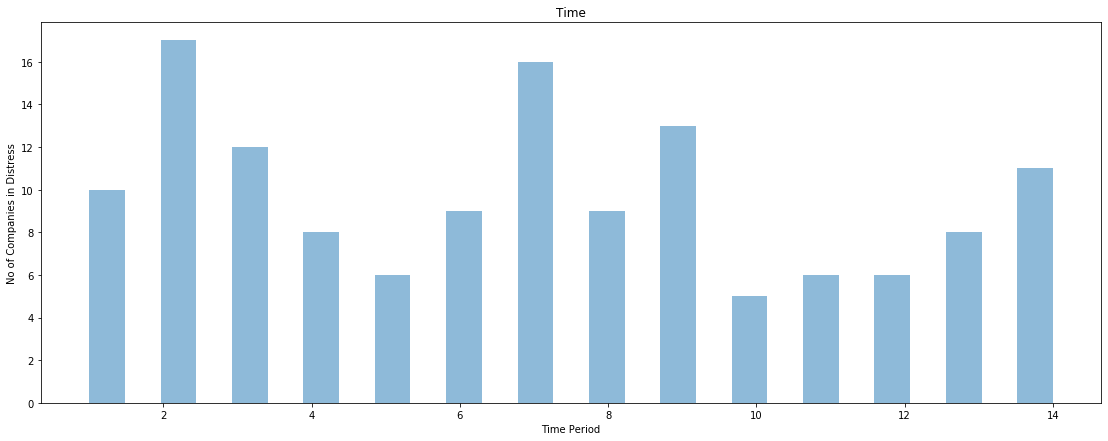

In [44]:
df_fortime = pd.read_csv('Financial Distress.csv')
df_time = pd.DataFrame(df_fortime, columns= ['Time', 'Financial Distress'])
df_time['Financial Distress'] = df_time['Financial Distress'].apply(lambda X : 1 if X < -0.5 else 0 )
df_new = df_time.loc[df_time['Financial Distress'] == 1]
df_new.hist(column='Time',bins=27, alpha=0.5,figsize = (19,7), grid = False)
plt.xlabel('Time Period')
plt.ylabel('No of Companies in Distress')

```
As we can observe Companies in Distress at different Time periods we find that most companies were in
Distress at 2,7
```

In [74]:
df_scatter = pd.DataFrame(df_final, columns=['x10','x48','x81','Financial Distress'])
df_scatter['Target'] = df_scatter['Financial Distress'].apply(lambda X : 1 if X <= -0.5 else (0 if X > -0.5 else X) )
#scatter_matrix(df_scatter, alpha=0.2,c = df_scatter['Financial Distress'], figsize=(15,10), diagonal="kde");
#target = df_scatter['Financial Distress'].apply(lambda X : 1 if X <= -0.5 else (0 if X > -0.5 else X) )

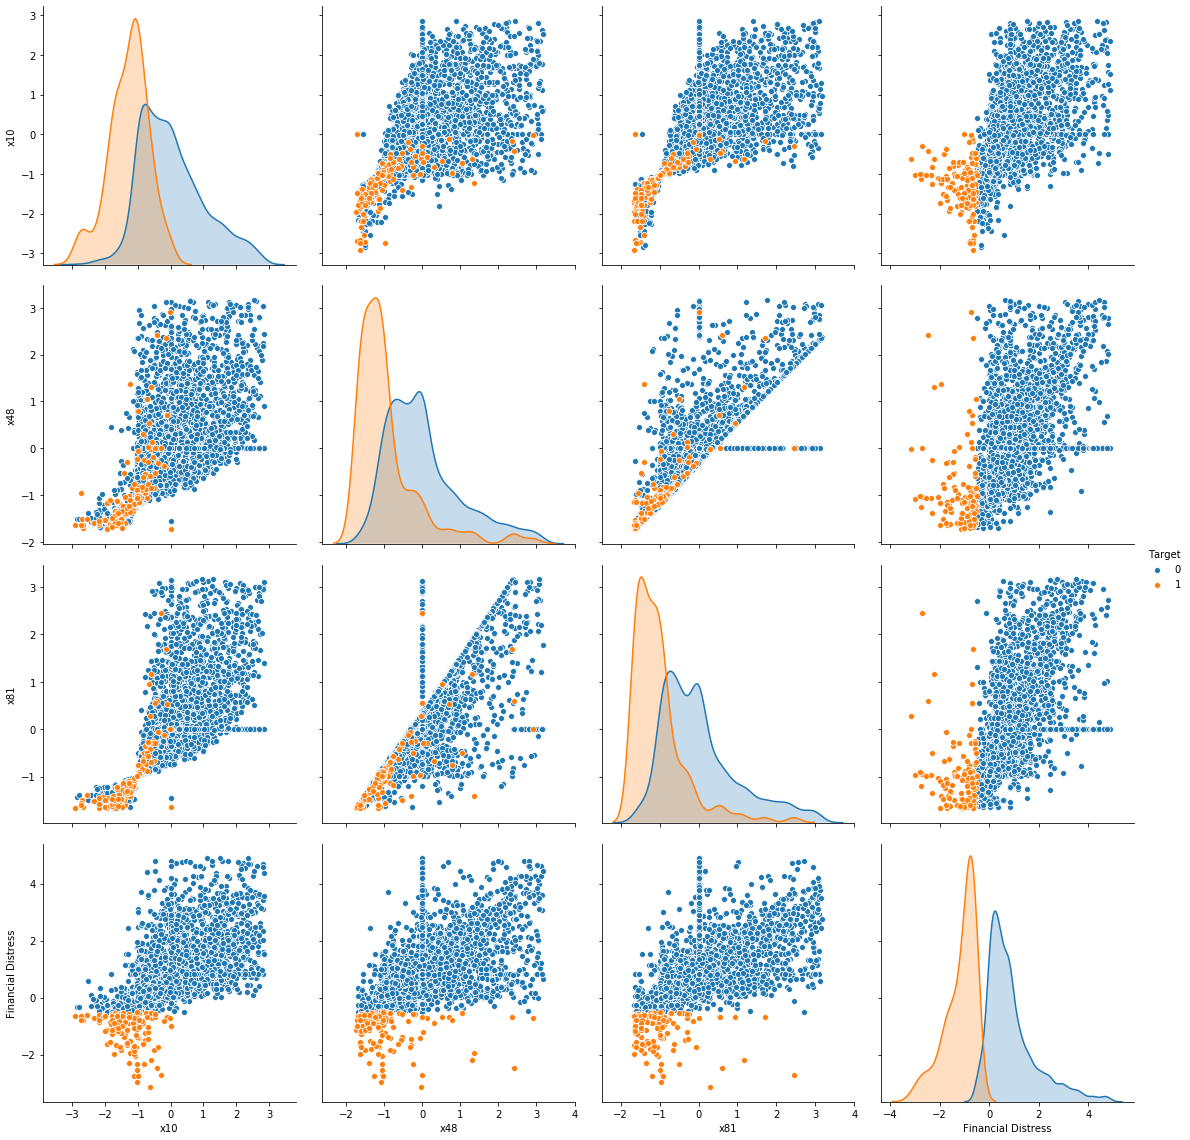

In [82]:
sns.pairplot(df_scatter, vars = ['x10','x48','x81','Financial Distress'], diag_kind='kde', hue = 'Target',  height= 4);

```
Looking at scatter plot correlation among the features themselves seems to be high. 
```

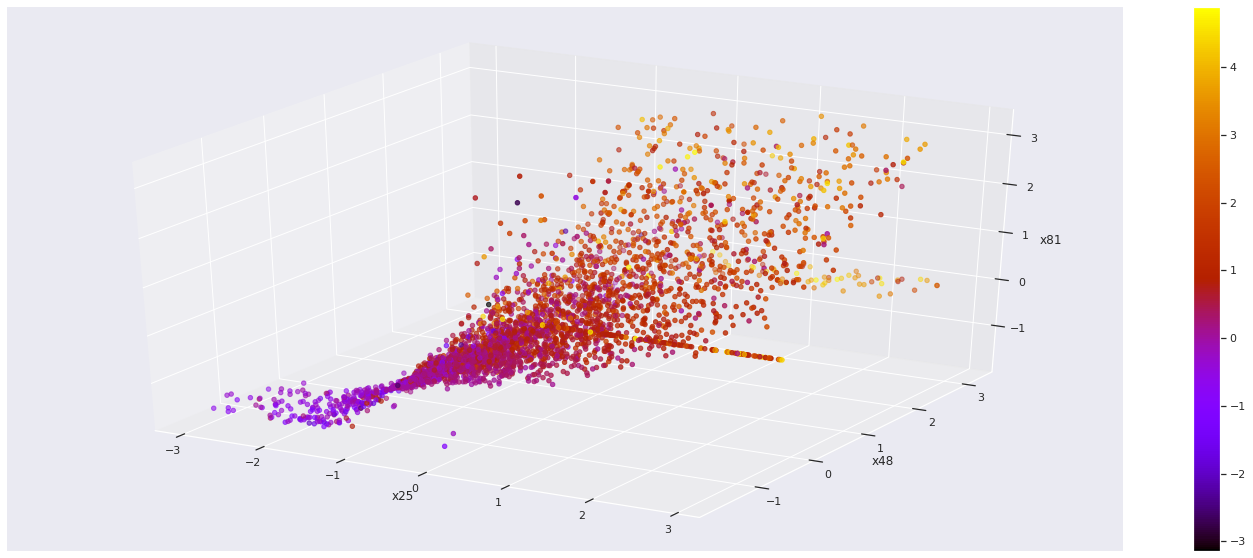

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#df = pd.read_csv('2016.csv')
sns.set(style = "darkgrid")
sns.color_palette(["b", 'g'])

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection = '3d')
##sty='darkgrid'
#ax.set_title('style: {!r}'.format(sty), color='C2')

#x = df_areaPlot['Financial Distress']
x = df_final['x10']
y = df_final['x48']
z = df_final['x81']
target = df_final[['Financial Distress']]
#target[(target<=-0.5)] = 1; 
#target[(target>-0.5)] =0;


ax.set_xlabel("x25")
ax.set_ylabel("x48")
ax.set_zlabel("x81")

#ax.scatter(x,c='b', y, z,c='r')
img = ax.scatter(x, y, z, c= target, cmap = 'gnuplot', marker='o', )
fig.colorbar(img) #use hue 


```
We can see how Financial Distress increases linearly with all three and it’s safe to assume that they will have a higher weight when building regression models
```

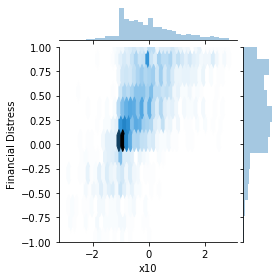

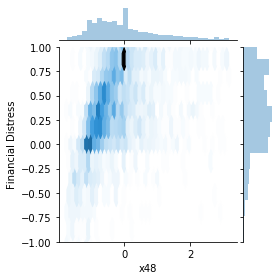

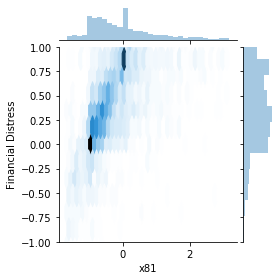

In [83]:

sns.jointplot(x = df_final['x10'], y = df_final['Financial Distress'], kind = 'hex', ylim=(-1,1), height= 4)
sns.jointplot(x = df_final['x48'], y = df_final['Financial Distress'], kind = 'hex', ylim=(-1,1), height= 4)
sns.jointplot(x = df_final['x81'], y = df_final['Financial Distress'], kind = 'hex', ylim=(-1,1), height= 4)

```
 This plot reveals in what areas Financial Distress values are denser against all the three features
```

# Model Building

Models we are considering to try:

1) Linear (Ridge,Lasso, Elastic Net , other types) - Navneeth

2) Polynomial (Ridge, Lasso, Elastic Net, other types) - Bentic

3) SGD,SVM,KNN,Neural Net - Sharath

4) Decision Trees, Ensemble Methods - Sumanth

In [ ]:
#get resreg
!pip install resreg

## Functions used for Dashboard and Jupyter

Raw Data

In [2]:
def load_data():
  df = pd.read_csv('Financial Distress.csv')
  return df

Pre Processed Data

In [3]:
def processed_df(df):
    '''
    Function for getting cleaned and transformed data)
    '''
    #df = pd.read_csv('Financial Distress.csv')
    df1 = df.iloc[:, 3:]
    df1 = df1.drop('x80', axis =1)
    
    Q1=df1.quantile(q=0.25)                      
    Q3=df1.quantile(q=0.75)
    IQR= Q3-Q1
    
    fd = df[['Financial Distress']] #
    Q1fd=fd.quantile(q=0.25)                      
    Q3fd=fd.quantile(q=0.75)
    IQRfd= Q3fd-Q1fd

    df_fd = fd[(fd >=(Q1fd-3*IQRfd))& (fd <= Q3fd+3*IQRfd)]  


    df_inp = df1[(df1 >=(Q1-1.5*IQR))& (df1 <= Q3+1.5*IQR)]
    df_inp = pd.concat([df_fd, df_inp], axis =1)

    imp_mean= SimpleImputer(missing_values=np.nan,strategy='mean')
    imp_mean.fit(df_inp)
    df_imp = pd.DataFrame(imp_mean.transform(df_inp))
    col = df1.columns.insert(0, 'Financial Distress')
    df_imp.columns = col
    
    scaler=StandardScaler()
    df_scal = copy.deepcopy(df_imp)
    df_scal = df_scal.iloc[:, 1:]
    
    model = scaler.fit(df_scal)
    scaled_data= pd.DataFrame(model.transform(df_scal))   
    scaled_data.columns= df_scal.columns

    df_findis = df_imp[['Financial Distress']]
    df_final =  pd.concat([df_findis, scaled_data], axis =1)
    #   scaled_data = scaled_data.iloc[:, :]
    #scaled_data = pd.concat([scaled_fd, scaled_data], axis =1)
    
    return df_final

Descriptive Statistics

In [4]:
def descriptive_stats(df_):  
  '''Function for descriptive statisctics'''        
  ds = df_.describe()
  temp  = pd.concat([df_.skew(), df_.kurtosis()], axis = 1)
  temp.columns = ['skewness', 'kurtosis']
  temp = temp.T
  stats = pd.concat([ds, temp])
  return stats

Correlation 

In [5]:
def get_corr(df ,pos, neg):
  
  '''Function that returns correlation dictionary for each feature which can be useful for analysing dependency among features and target variable'''
  corr_df = df.corr()
  corr_df = pd.DataFrame(corr_df)
  fd_corr = corr_df.iloc[0, :] 

  corr = pd.DataFrame(corr_df[(corr_df>=pos)|(corr_df<= neg)])
  corr_dict = {}
  for f in corr.index:
    corr_dict[f] = pd.DataFrame(corr.sort_values(f)[f].dropna())
  return corr_df, fd_corr, corr_dict
  

Train Validation Test split

In [6]:
def get_train_val_test_data(df,val = False,poly= False, k = 45, crit = -0.5, rel_thresh = 0.8, ovr = 3.0, rare_percentile = 4, fea = False):
  '''Function that splits data into Train, Test and Validation set with oversampling rare domain'''
  T = df.iloc[:, 0]
  X = df.iloc[:, 1:]
 
  #polynomial
  if poly: 
    poly_reg = PolynomialFeatures(degree=3)
    X = poly_reg.fit_transform(X)
  #dimensionality reduction and feature selection
  #reduce_dimensions(df, 10, 20,X_train, True)  #feature_selection_RFECV(model,1,5,X_train,t_train)
  #feature_selection_VT(X_train,0.8)
  if fea:
    X= SelectKBest(mutual_info_regression, k = k).fit_transform(X, T)
  y = copy.deepcopy(T)
  y[(y>=crit)] = 0; y[(y<crit)] = 1
  X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=15, stratify = y)

  #polynomial
  #X_poly = poly_reg.fit_transform(X_train)

  relevance = resreg.sigmoid_relevance(t_train, cl=np.percentile(T, rare_percentile), ch=None)
  X_train, t_train = resreg.random_oversample(X_train, t_train, relevance, relevance_threshold=rel_thresh, over= ovr, random_state=34)
  if val:         #to return validation set val = True when calling the function
    y1 = copy.deepcopy(t_train)
    y1[(y1>=crit)] = 0; y1[(y1<crit)] = 1
    X_train, X_val, t_train, t_val = train_test_split(X_train, t_train, test_size=0.15, random_state = 15, stratify = y1)
    return  X_train, X_val, X_test, t_train, t_val, t_test
  else:
    return X_train, X_test, t_train, t_test

Train Model


In [7]:
def train_model( model, X_train, t_train ):
  '''Function that return the trained model'''
  model.fit(X_train, t_train)
  return model 

Evaluate Validation and Test Data

In [21]:
def evaluation_report(train_model, X_train, t_train, X_test, t_test, val = False, crit = -0.5):
  '''Function that results evaluation report'''
  pred_val = train_model.predict(X_test)
  true_val = t_test
  y = copy.deepcopy(t_train)
  y[(y>=crit)] = 0; y[(y<crit)] = 1
  ytr = copy.deepcopy(t_train)
  ytr[(ytr>=crit)] = 0; ytr[(ytr<crit)] = 1
  ytst = copy.deepcopy(t_test)
  ytst[(ytst>=crit)] = 0; ytst[(ytst<crit)] = 1

  plt.figure(figsize=(12,4))
  plt.subplot(131)
  axi = sns.distplot(true_val, hist = False, color = 'g', label = "Actual Value", bins = 20)
  sns.distplot(pred_val, hist = False, color = 'b', label = "Predicted Value", bins = 20, ax= axi)
  plt.legend(loc="upper right")

  plt.subplot(132)
  sns.scatterplot(true_val, pred_val)
  plt.plot([crit]*8, range(-4, 4, 1), 'r')
  plt.plot(range(-5, 20, 1), [crit]*25, 'r')
  plt.xlabel('True Value')
  plt.ylabel('Predicted Value')

  true_class = copy.deepcopy(true_val); true_class[(true_class>=crit)] = 0; true_class[(true_class<crit)] = 1
  pred_class = copy.deepcopy(pred_val); pred_class[(pred_class>=crit)] = 0; pred_class[(pred_class<crit)] = 1
  cm = confusion_matrix(true_class, pred_class)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=['0','1']).plot()
  #cm_display = ConfusionMatrixDisplay(cm,display_labels=['True','Predicted']).plot()

  results = {}
  # results['True Values set range'] = true_val.min()) (true_val.max())
  # results['Predicted Values set range'] = str(pred_val.min())+','+ str(pred_val.max())
  results['True values min'] = (true_val.min())
  results['True values max'] = (true_val.max())

  results['Predicted Values min'] = (pred_val.min())
  results['Predicted Values max'] = (pred_val.max())
  results['Accuracy'] = str(accuracy_score(true_class, pred_class)*100) + '%'
  results['R2 score'] = r2_score(true_val, pred_val)
  results['Mean Squared error'] = mean_squared_error(true_val, pred_val)
  results['Max Error'] = max_error(true_val, pred_val)
  results['Total Train Samples'] = X_train.shape[0]
  results['Total ratio of 0s and 1s in Train'] = np.count_nonzero(ytr == 0)/np.count_nonzero(ytr == 1)
  if val:
    results['Total validation Samples'] = X_test.shape[0]
    results['Total ratio of 0s and 1s in Validation'] = np.count_nonzero(ytst == 0)/np.count_nonzero(ytst == 1)
  else:
    results['Total Test Samples'] = X_test.shape[0]
    results['Total ratio of 0s and 1s in Test'] = np.count_nonzero(ytst == 0)/np.count_nonzero(ytst == 1)
  results = pd.DataFrame(results, index = [0])
  display(results)
  

  

  


All Models

In [9]:

model_knn = KNeighborsRegressor(n_neighbors=100, weights= 'uniform', algorithm='brute',leaf_size = 10, metric='canberra', p =2)

model_svr_sig = SVR(kernel='sigmoid', degree=3, gamma='scale', epsilon=0.001, C=7, coef0= -1.4)
#third best mdodel
model_nn = MLPRegressor(hidden_layer_sizes=(45,), activation= 'identity', solver = 'adam', alpha= 0.00001, learning_rate= 'adaptive', 
                     learning_rate_init=0.00005, max_iter= 100000, warm_start=True, early_stopping= True)
#************
model_svr_rbf = SVR(kernel='rbf', degree=2, gamma='auto', epsilon=0.001, C=100)
#best so far 
model_linear_elastic = ElasticNet(alpha=0.05,l1_ratio= 0.5, max_iter=1000, tol=0.00001, fit_intercept= True, warm_start=False)    
#************
model_svr_poly = SVR(kernel='poly', degree=5, gamma='auto', epsilon=0.01, C=100, coef0= 1)
model_svr_linear = SVR(kernel = 'linear', epsilon = 0.001, C =10)
model_sgd = SGDRegressor(loss='epsilon_insensitive',power_t=0.05, penalty='elasticnet', l1_ratio=0.5, alpha= 0.01, epsilon= 0.001, learning_rate='optimal', max_iter= 100000, eta0=0.00001)
#model_linear_svr = LinearSVR(epsilon = 0.0001, C = 100, fit_intercept= True)
model_linear_Lasso = Lasso(alpha=0.000001,tol=0.0001,selection='random',max_iter= 10000000, copy_X=True,fit_intercept=True)
model_linear = LinearRegression(fit_intercept=True,normalize=True,n_jobs=1,copy_X=True)
#second best model 
model_rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, min_samples_leaf=3, max_features=10)
#************
model_linear_ridge = Ridge(alpha=0.000001,tol=0.00001,solver='sparse_cg',copy_X=True,fit_intercept=True)

model_dt = DecisionTreeRegressor(max_depth=9, splitter= 'best' , max_leaf_nodes=15 , criterion= 'mse') 
model_etr = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=45,min_samples_leaf=45)

model = ElasticNet(alpha=0.02,max_iter=1000, tol=0.0001, warm_start=False)                                  # best parameters we will do grid search in the Future to see evaluate overall
#evaluation_report_polynomial_test(model, 34, 67)
#evaluation_report_LinearRegression_Poly_test(model,poly_reg, 34, 67)

Loading data

In [42]:
df = load_data()
df_processed = processed_df(df)
X_train, X_val, X_test, t_train, t_val, t_test = get_train_val_test_data(df_processed, val = True)


Running models

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843               -2.7519   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.391255  95.26748971193416%  0.551897            0.661655   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   4.202716                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

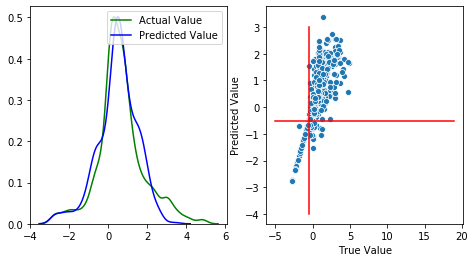

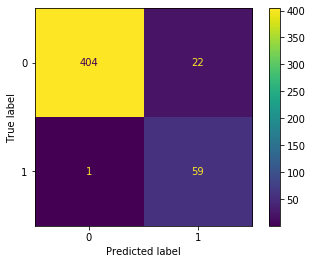

In [50]:
model_knn = KNeighborsRegressor(n_neighbors=14, weights= 'distance', algorithm='brute',leaf_size = 10, metric='canberra', p =2)
trained_model = train_model(model_knn, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.750677   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.425765  93.82716049382715%  0.583907             0.61439   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.458218                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

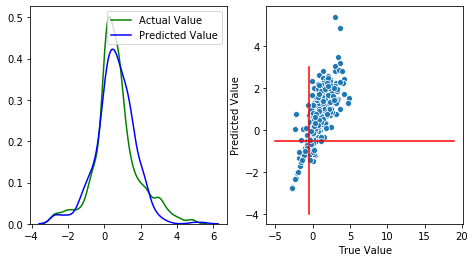

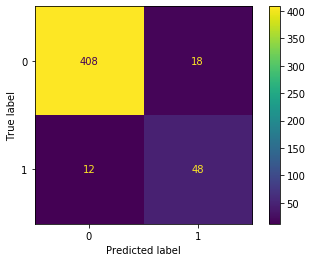

In [25]:
model_svr_sig = SVR(kernel='sigmoid', degree=3, gamma='scale', epsilon=0.001, C=7, coef0= -1.4)
trained_model = train_model(model_svr_sig, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.558903   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.225357  90.74074074074075%  0.533394            0.688977   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.950029                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

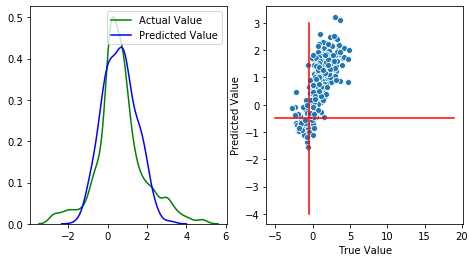

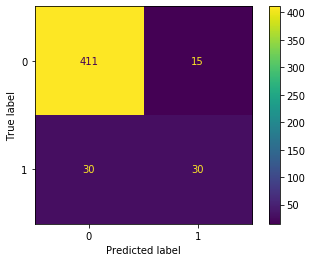

In [26]:
model_nn = MLPRegressor(hidden_layer_sizes=(45,), activation= 'identity', solver = 'adam', alpha= 0.00001, learning_rate= 'adaptive', 
                     learning_rate_init=0.00005, max_iter= 100000, warm_start=True, early_stopping= True)
trained_model = train_model(model_nn, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.750879   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.741374  97.32510288065843%  0.616961            0.565584   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.638225                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

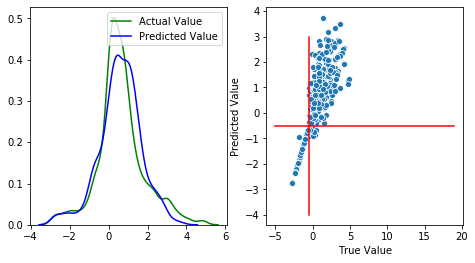

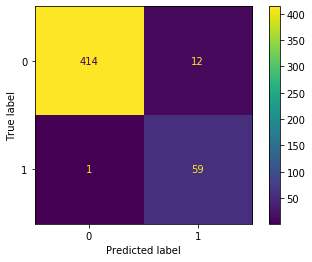

In [27]:
model_svr_rbf = SVR(kernel='rbf', degree=2, gamma='auto', epsilon=0.001, C=100)
trained_model = train_model(model_svr_rbf, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.186504   

   Predicted Values max           Accuracy  R2 score  Mean Squared error  \
0              3.027467  90.3292181069959%  0.523853            0.703064   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.553559                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

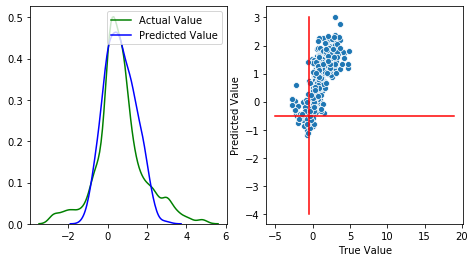

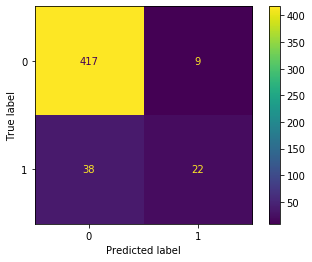

In [28]:
model_linear_elastic = ElasticNet(alpha=0.05,l1_ratio= 0.5, max_iter=1000, tol=0.00001, fit_intercept= True, warm_start=False)    
trained_model = train_model(model_linear_elastic, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.741697   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.595869  96.70781893004116%  0.617923            0.564164   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.746392                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

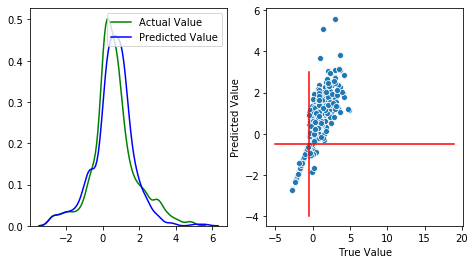

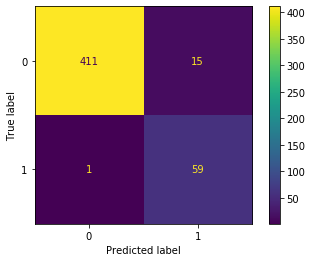

In [68]:
model_svr_poly = SVR(kernel='poly', degree=10, gamma='auto', epsilon=0.01, C=100, coef0= 1)    
trained_model = train_model(model_svr_poly, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -0.967536   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.063882  89.91769547325103%  0.511505            0.721297   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.734961                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

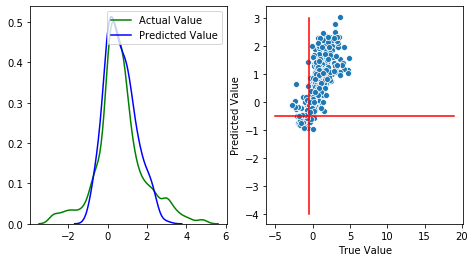

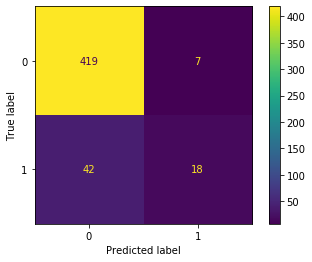

In [30]:
model_svr_linear = SVR(kernel = 'linear', epsilon = 0.001, C =10)  
trained_model = train_model(model_svr_linear, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.063322   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.008291  88.88888888888889%  0.493653            0.747657   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.783097                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

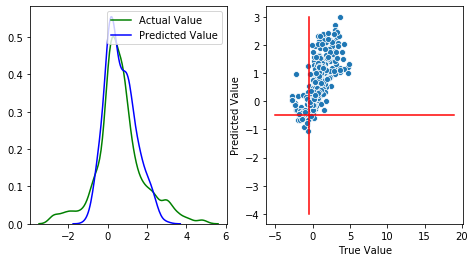

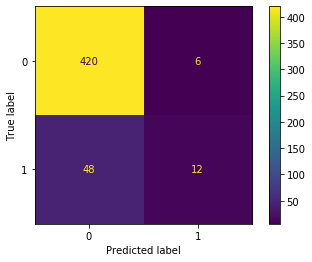

In [31]:
model_sgd = SGDRegressor(loss='epsilon_insensitive',power_t=0.05, penalty='elasticnet', l1_ratio=0.5, alpha= 0.01, epsilon= 0.001, learning_rate='optimal', max_iter= 100000, eta0=0.00001)   
trained_model = train_model(model_sgd, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741.353299001164, tolerance: 0.382263437646169
  positive)


True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.305378   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.101768  90.74074074074075%  0.549925            0.664568   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.422387                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

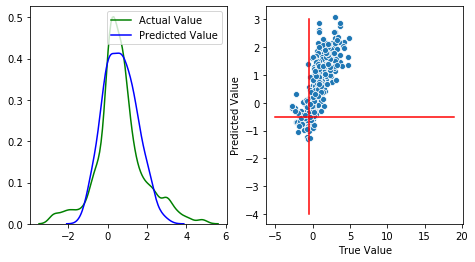

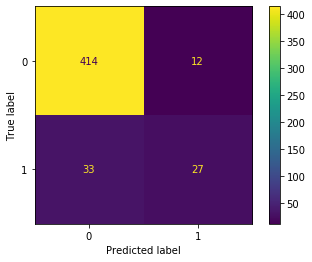

In [32]:
model_linear_Lasso = Lasso(alpha=0.000001,tol=0.0001,selection='random',max_iter= 100000, copy_X=True,fit_intercept=True)   
trained_model = train_model(model_linear_Lasso, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.356129   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.099265  90.53497942386831%  0.548032            0.667363   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.433039                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

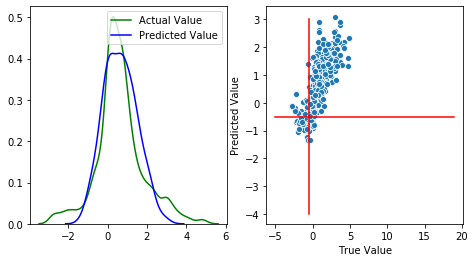

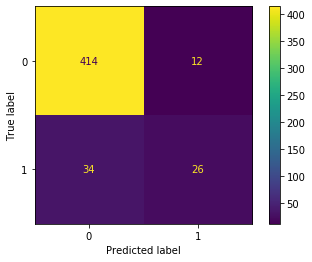

In [33]:
model_linear = LinearRegression(fit_intercept=True,normalize=True,n_jobs=1,copy_X=True)
trained_model = train_model(model_linear, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843              -2.18583   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.084832  96.29629629629629%  0.660618            0.501122   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.460648                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

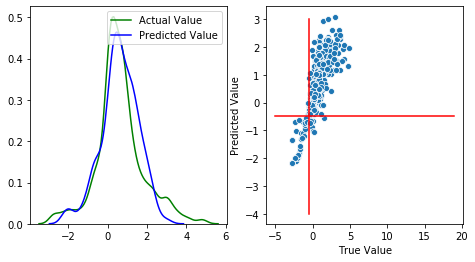

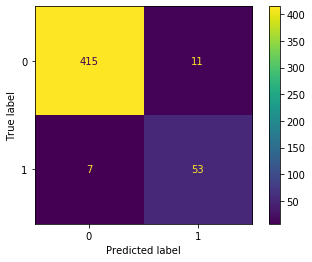

In [62]:
model_rf = RandomForestRegressor(n_jobs=-1, n_estimators=20, min_samples_leaf=3, max_features=10, random_state=20)  
trained_model = train_model(model_rf, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.357226   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              3.100471  90.74074074074075%  0.548518            0.666645   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.421449                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

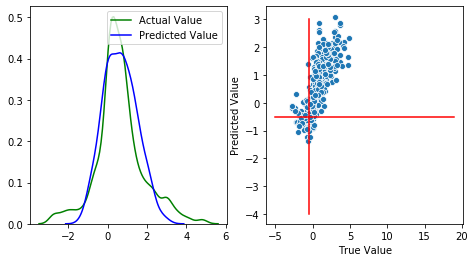

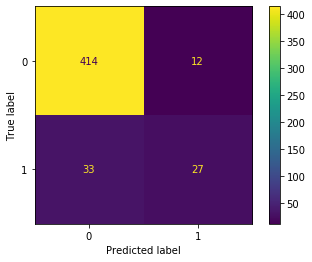

In [35]:
model_linear_ridge = Ridge(alpha=0.000001,tol=0.00001,solver='sparse_cg',copy_X=True,fit_intercept=True)
trained_model = train_model(model_linear_ridge, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.655131   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              2.988353  91.76954732510289%  0.567867            0.638075   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.564373                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

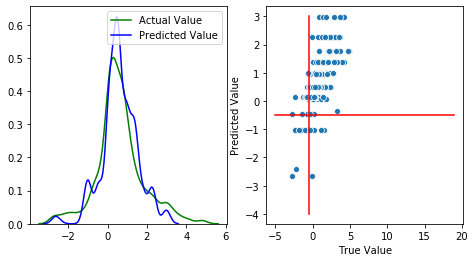

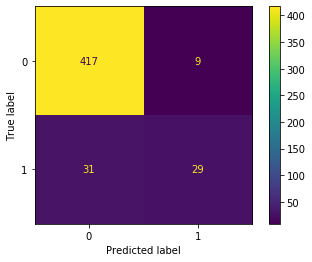

In [36]:
model_dt = DecisionTreeRegressor(max_depth=9, splitter= 'best' , max_leaf_nodes=15 , criterion= 'mse')   
trained_model = train_model(model_dt, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.227062   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              2.459518  91.76954732510289%  0.590114            0.605225   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.544728                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

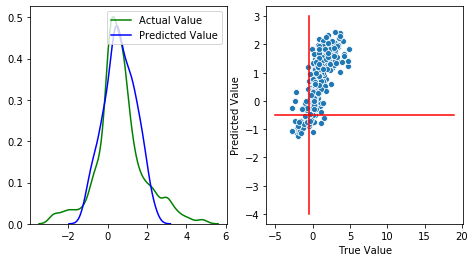

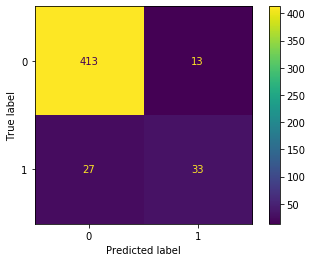

In [37]:
model_etr = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=45,min_samples_leaf=45)  
trained_model = train_model(model_etr, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -1.255326   

   Predicted Values max           Accuracy  R2 score  Mean Squared error  \
0              3.035753  90.3292181069959%   0.53793            0.682279   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.460792                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

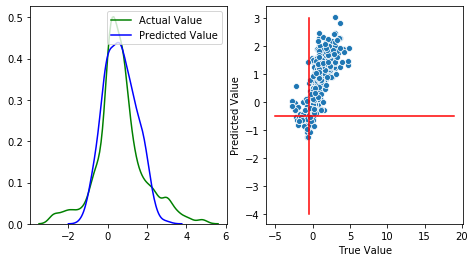

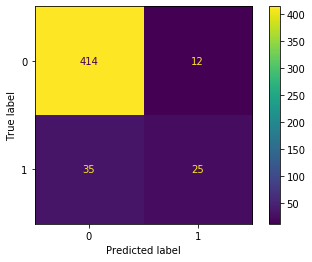

In [79]:
model_elasticnet = ElasticNet(alpha=0.02,max_iter=1000, tol=0.0001, warm_start=False)  
trained_model = train_model(model, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

In [39]:
X_train, X_val, X_test, t_train, t_val, t_test = get_train_val_test_data(df_processed, val = True, poly =True)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7681022885577136, tolerance: 0.382263437646169
  positive)


True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.605807   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.201722  93.82716049382715%  0.563419            0.644643   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   4.536573                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

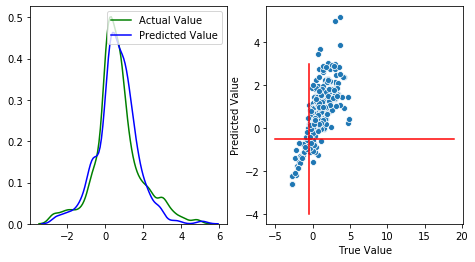

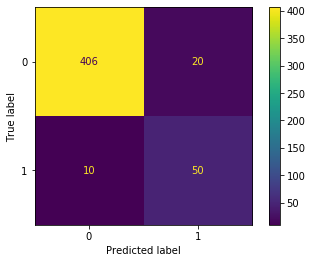

In [40]:
# Polynomial degree=2
model_poly_ElasticNet = ElasticNet(alpha=0.02,max_iter=1000, tol=0.0001, warm_start=False)
trained_model = train_model(model_poly_ElasticNet, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843               -2.7519   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.061668  95.26748971193416%  0.489538            0.753733   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   4.158954                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

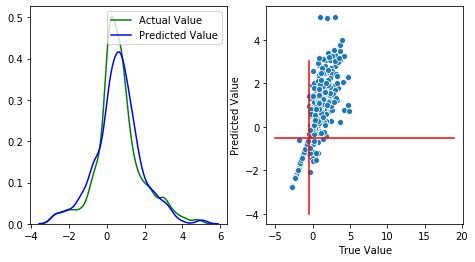

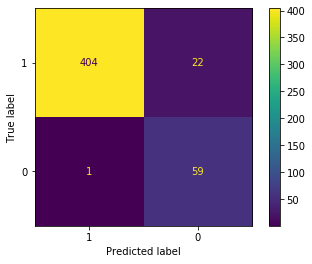

In [14]:
#Polynomial degree=2
model_poly_Ridge = Ridge(alpha=0.008,max_iter=1000,tol=0.001)  
trained_model = train_model(model_poly_Ridge, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.681074866519253, tolerance: 0.382263437646169
  positive)


True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.739806   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0               5.49234  93.20987654320987%  0.434542            0.834938   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   5.272865                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

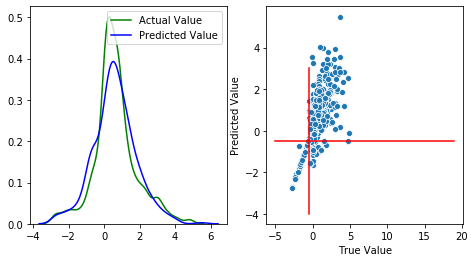

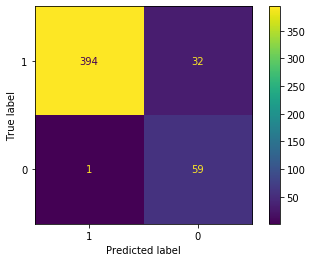

In [15]:
#Polynomial degree=2
model_poly_Lasso = Lasso(alpha=0.001,max_iter=1000, tol=0.0001, warm_start=False) 
trained_model = train_model(model_poly_Lasso, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7681022885577136, tolerance: 0.382263437646169
  positive)


True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.605807   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.201722  93.82716049382715%  0.563419            0.644643   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   4.536573                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

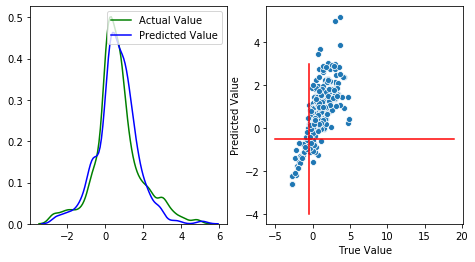

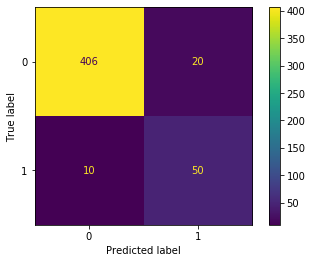

In [41]:
#Polynomial degree=3
model_poly_ElasticNet = ElasticNet(alpha=0.02,max_iter=1000, tol=0.0001, warm_start=False)
trained_model = train_model(model_poly_ElasticNet, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843               -2.7519   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0              5.061668  95.26748971193416%  0.489538            0.753733   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   4.158954                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

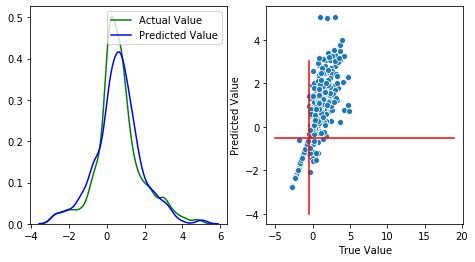

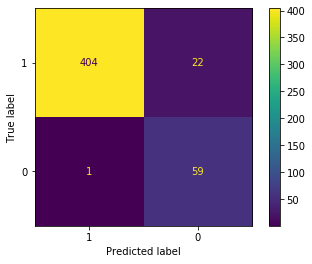

In [16]:
#Polynomial degree=3
model_poly_Ridge = Ridge(alpha=0.008,max_iter=1000,tol=0.001)  
trained_model = train_model(model_poly_Ridge, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_val, t_val, val = True)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.681074866519253, tolerance: 0.382263437646169
  positive)


True values min  True values max  Predicted Values min  \
0          -2.7519           4.8843             -2.739806   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0               5.49234  93.20987654320987%  0.434542            0.834938   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   5.272865                 2748                           7.130178   

   Total validation Samples  Total ratio of 0s and 1s in Validation  
0                       486                                     7.1

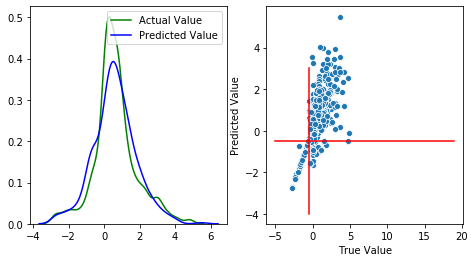

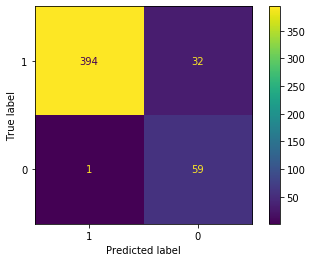

In [17]:
#Polynomial degree=3
model_poly_Lasso = Lasso(alpha=0.001,max_iter=1000, tol=0.0001, warm_start=False) 
trained_model = train_model(model_poly_Lasso, X_train, t_train )
evaluation_report(trained_model, X_train, t_train,X_val, t_val, val = True)

For Testing Stacked Model

In [18]:
df = load_data()
df_processed = processed_df(df)
X_train, X_test, t_train, t_test = get_train_val_test_data(df_processed, val = False)

In [84]:
estimators = [
    ('elastic_net', model_elasticnet),
    ('Random', model_rf),
    ('Neural_Net', model_nn)
]

stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator= ElasticNet(alpha=0.05,l1_ratio= 0.5, max_iter=1000, tol=0.00001, fit_intercept= True, warm_start=False)
)


True values min  True values max  Predicted Values min  \
0          -1.8385           4.8878             -0.950767   

   Predicted Values max            Accuracy  R2 score  Mean Squared error  \
0               2.94175  96.73469387755102%  0.549177            0.509985   

   Max Error  Total Train Samples  Total ratio of 0s and 1s in Train  \
0   3.477118                 2748                           7.130178   

   Total Test Samples  Total ratio of 0s and 1s in Test  
0                 735                              28.4

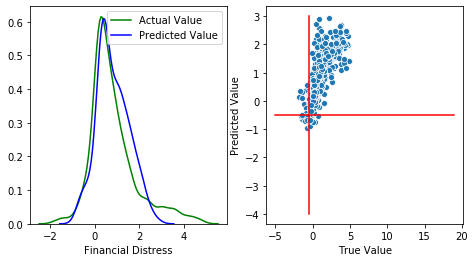

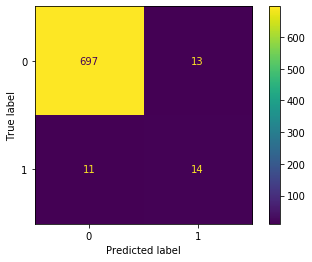

In [85]:
#stacked_model
trained_model = train_model(stacked_model, X_train, t_train )
evaluation_report(trained_model, X_train, t_train, X_test, t_test, val = False)

```
This is result of Stacked Model with 96.73% accuracy and 0.55 r2score which is acceptable
```